In [103]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import math
from sklearn.model_selection import TimeSeriesSplit
import pyodbc
import pandas.io.sql as sql
from sklearn.preprocessing import StandardScaler
import tensorflow
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import pandas as pd
from datetime import datetime
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


In [5]:
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

In [6]:
poll = pd.read_csv('D:projects/Air-Pot/sensor_data/latest_pollutant.csv')

In [7]:
poll.shape

(1458636, 20)

In [8]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458636 entries, 0 to 1458635
Data columns (total 20 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1458636 non-null  int64  
 1   _id          1458636 non-null  object 
 2   date_time    1458636 non-null  float64
 3   latitude     1458341 non-null  float64
 4   longitude    1458341 non-null  float64
 5   site_code    1458636 non-null  object 
 6   postal_code  1458636 non-null  object 
 7   NO2          1253086 non-null  float64
 8   PM10         834126 non-null   float64
 9   SO2          162677 non-null   float64
 10  FINE         41844 non-null    float64
 11  O3           546017 non-null   float64
 12  PM1          18309 non-null    float64
 13  PM25         588042 non-null   float64
 14  TSP          18188 non-null    float64
 15  CO           27696 non-null    float64
 16  so2          52 non-null       float64
 17  no2          51 non-null       float64
 18  NO

In [9]:
poll = poll.dropna(axis=0, how='any', subset=['latitude','longitude'])

In [10]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458341 entries, 0 to 1458635
Data columns (total 20 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1458341 non-null  int64  
 1   _id          1458341 non-null  object 
 2   date_time    1458341 non-null  float64
 3   latitude     1458341 non-null  float64
 4   longitude    1458341 non-null  float64
 5   site_code    1458341 non-null  object 
 6   postal_code  1458341 non-null  object 
 7   NO2          1253086 non-null  float64
 8   PM10         833831 non-null   float64
 9   SO2          162677 non-null   float64
 10  FINE         41739 non-null    float64
 11  O3           546017 non-null   float64
 12  PM1          18203 non-null    float64
 13  PM25         587747 non-null   float64
 14  TSP          18188 non-null    float64
 15  CO           27696 non-null    float64
 16  so2          52 non-null       float64
 17  no2          51 non-null       float64
 18  NO

In [11]:
poll['latitude'] =poll['latitude'].apply(lambda x: truncate(x, 5))

In [12]:
poll['longitude'] =poll['longitude'].apply(lambda x: truncate(x, 5))

In [13]:
poll.head()

,Unnamed: 0,_id,date_time,latitude,longitude,site_code,postal_code,NO2,PM10,SO2,FINE,O3,PM1,PM25,TSP,CO,so2,no2,NO,AQI
0,0,5ffbf067f1c51405084e3231,1.606784e+09,50.83214,-0.27749,ERG_AD1,BN435DE,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5ffbf067f1c51405084e3232,1.606788e+09,50.83214,-0.27749,ERG_AD1,BN435DE,4.3,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5ffbf067f1c51405084e3233,1.606792e+09,50.83214,-0.27749,ERG_AD1,BN435DE,4.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5ffbf067f1c51405084e3234,1.606795e+09,50.83214,-0.27749,ERG_AD1,BN435DE,5.5,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5ffbf067f1c51405084e3235,1.606799e+09,50.83214,-0.27749,ERG_AD1,BN435DE,7.5,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
quardinate=poll[['latitude','longitude']].astype(str).agg(','.join, axis=1)

In [15]:
quardinate.head()

0    50.83214,-0.27749
1    50.83214,-0.27749
2    50.83214,-0.27749
3    50.83214,-0.27749
4    50.83214,-0.27749
dtype: object

In [16]:
latlong = pd.DataFrame(columns=['latitude','longitude'])

In [17]:
unique=quardinate.unique()

In [18]:
unique.shape

(404,)

In [19]:
for i in unique:
    lis = i.split(",")
    latitude = float(lis[0])
    longitude = float(lis[1])
    latlong = latlong.append({'latitude': latitude , 'longitude': longitude }, ignore_index=True)

In [20]:
latlong.head()

,latitude,longitude
0,50.83214,-0.27749
1,51.56375,0.17789
2,51.52938,0.13285
3,51.49061,0.15891
4,51.49464,0.13727


In [21]:
latlong.shape

(404, 2)

In [75]:
latlong.to_csv('D:\Air-Pot\sensor_data/pollutant_latlong.csv')

In [37]:
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'livetap.cclknen2qxpx.eu-west-2.rds.amazonaws.com' 
database = 'livetap' 
username = 'sa' 
password = 'Hafizalaka1989' 
#cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cnxn = pyodbc.connect(driver='{SQL Server}', host=server, database=database, user=username, password=password)
cursor = cnxn.cursor()

    



In [41]:
Livetap=pd.read_sql("select top 10000 last_synchronized_time Date,zid,slot,uh_zephr_id,city,country,data,description from dbo.zephyr_data z join dbo.zephyr x on x.id=z.uh_zephr_id join dbo.metrics m on m.id=z.metrics_id where description!='Timestamp' and description!= 'Timestamp-UTS' ", (cnxn))

In [ ]:
Livetap=pd.read_sql("select zid,data,name,location_name from dbo.zephyr_data z join dbo.zephyr x on x.id=z.uh_zephr_id join dbo.metrics m on m.id=z.metrics_id", (cnxn))

In [34]:
Livetap.head()

,latitude,longitude,collection_time,zid,data,name,location_name
0,53.803826667,-1.546125000,2019-12-21 12:17:23.0000000,199,95,ambHumidity,Queeen Square S Acre Primary School
1,53.803826667,-1.546125000,2019-12-21 12:18:23.0000000,199,95,ambHumidity,Queeen Square S Acre Primary School
2,53.803826667,-1.546125000,2019-12-21 12:19:23.0000000,199,95,ambHumidity,Queeen Square S Acre Primary School
3,53.803826667,-1.546125000,2019-12-21 12:20:23.0000000,199,94,ambHumidity,Queeen Square S Acre Primary School
4,53.803826667,-1.546125000,2019-12-21 12:21:23.0000000,199,94,ambHumidity,Queeen Square S Acre Primary School


In [35]:
index=['latitude','longitude','collection_time','zid','location_name'],

In [36]:
Livetap = Livetap.pivot(columns='name', values='data')
Livetap.head()

name,NO,NO2,O3,ambHumidity,dateTime,latitude,longitude,particulatePM10
0,NaN,NaN,NaN,95,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,95,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,95,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN


In [21]:
coor = pd.read_csv("D:/Air-Pot/Zid.csv")
header = ['OS_TOPO_TOID','OS_TOPO_TOID_VERSION','BHA_ProcessDate','TileRef','AbsHMin','AbsH2','AbsHMax','RelH2','RelHMax','BHA_Conf']

In [22]:
for i in range(1,16):
    if i not in [3,10]:
        data = pd.read_csv("D:/Air-Pot/BHG_Data/BHG_"+str(i)+"/mastermap_building_heights/s/s1.csv", names=header)
        data.insert(0, 'latitude', coor.latitude[i-1])
        data.insert(1, 'longitude', coor.longitude[i-1])
        data.to_csv("D:/Air-Pot/BHG_Data/BHG_"+str(i)+"/mastermap_building_heights/s/s1.csv",index=False)
    elif i is 3:
        for j in range(1,3):
            data = pd.read_csv("D:/Air-Pot/BHG_Data/BHG_"+str(i)+"/mastermap_building_heights/s/s"+str(j)+".csv", names=header)
            data.insert(0, 'latitude', coor.latitude[i-1])
            data.insert(1, 'longitude', coor.longitude[i-1])
            data.to_csv("D:/Air-Pot/BHG_Data/BHG_"+str(i)+"/mastermap_building_heights/s/s"+str(j)+".csv",index=False)
    elif i is 10:
        for k in range(1,3):
            data = pd.read_csv("D:/Air-Pot/BHG_Data/BHG_"+str(i)+"/mastermap_building_heights/s"+str(k)+"/s1.csv", names=header)
            data.insert(0, 'latitude', coor.latitude[i-1])
            data.insert(1, 'longitude', coor.longitude[i-1])
            data.to_csv("D:/Air-Pot/BHG_Data/BHG_"+str(i)+"/mastermap_building_heights/s"+str(k)+"/s1.csv",index=False)         

In [24]:
height1 = pd.read_csv("D:/Air-Pot/Building_height_data/height1.csv")
height2 = pd.read_csv("D:/Air-Pot/Building_height_data/height2.csv")
height3_1 = pd.read_csv("D:/Air-Pot/Building_height_data/height3_1.csv")
height3_2 = pd.read_csv("D:/Air-Pot/Building_height_data/height3_2.csv")
height4 = pd.read_csv("D:/Air-Pot/Building_height_data/height4.csv")
height5 = pd.read_csv("D:/Air-Pot/Building_height_data/height5.csv")
height6 = pd.read_csv("D:/Air-Pot/Building_height_data/height6.csv")
height7 = pd.read_csv("D:/Air-Pot/Building_height_data/height7.csv")
height8 = pd.read_csv("D:/Air-Pot/Building_height_data/height8.csv")
height9 = pd.read_csv("D:/Air-Pot/Building_height_data/height9.csv")
height10_1 = pd.read_csv("D:/Air-Pot/Building_height_data/height10_1.csv")
height10_2 = pd.read_csv("D:/Air-Pot/Building_height_data/height10_2.csv")
height11 = pd.read_csv("D:/Air-Pot/Building_height_data/height11.csv")
height12 = pd.read_csv("D:/Air-Pot/Building_height_data/height12.csv")
height13 = pd.read_csv("D:/Air-Pot/Building_height_data/height13.csv")
height14 = pd.read_csv("D:/Air-Pot/Building_height_data/height14.csv")
height15 = pd.read_csv("D:/Air-Pot/Building_height_data/height15.csv")

In [25]:
building_height_data = pd.concat([height1, height2, height3_1,height3_2,height4,height5,height6,height7,height8,height9,height10_1,height10_2,height11,height12,height13,height14,height15])

In [27]:
building_height_data.to_csv("D:projects/Air-Pot/Building_height_data/all_building_height.csv",index=False)

In [22]:
building_height_data = pd.read_csv("D:projects/Air-Pot/Building_height_data/all_building_height.csv")

In [24]:
livetap = pd.read_csv("D:projects/Air-Pot/Live_tap/Livetap_Data.csv")


In [25]:
zid = pd.read_csv("D:projects/Air-Pot/zid.csv")

In [26]:
livetap=livetap.merge(zid,how='left')

In [27]:
livetap.columns

Index(['Timestamp', 'Ambient humidity', 'Ambient pressure', 'Ambient temp',
       'Humidity', 'NO', 'NO2', 'O3', 'Temp', 'PM1', 'PM10', 'PM25', 'zid',
       'date', 'Holiday', 'road_type', 'link_length_km', 'link_length_miles',
       'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
       'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
       'all_motor_vehicles', 'weekday', 'x', 'y', 'z', 'longitude', 'latitude',
       'location_name', 'city', 'country'],
      dtype='object')

In [28]:
livetap_new=livetap[['Timestamp', 'Ambient humidity', 'Ambient pressure', 'Ambient temp',
       'Humidity', 'NO', 'NO2', 'O3', 'Temp', 'PM1', 'PM10', 'PM25', 'zid','Holiday','weekday','longitude', 'latitude','location_name']]
livetap_new.sample(10)

,Timestamp,Ambient humidity,Ambient pressure,Ambient temp,Humidity,NO,NO2,O3,Temp,PM1,PM10,PM25,zid,Holiday,weekday,longitude,latitude,location_name
29350,2020-03-25 22:00:00+00:00,53.950000,101957.70000,9.600000,46.583333,3.716667,44.166667,0.083333,10.316667,15.216667,43.350000,29.616667,199,0,2,-1.546125,53.803827,Queeen Square S Acre Primary School
26498,2020-03-16 18:00:00+00:00,NaN,NaN,NaN,52.250000,16.550000,79.166667,7.016667,10.616667,4.516667,12.183333,5.983333,346,0,0,-2.078760,52.584142,ello
25386,2020-03-13 05:00:00+00:00,81.766667,99585.75000,6.050000,74.966667,13.016667,15.983333,35.750000,7.000000,4.033333,10.816667,5.116667,225,0,4,-2.126882,52.589433,Stafford Street
14199,2020-02-05 08:00:00+00:00,NaN,NaN,NaN,78.183333,107.800000,105.633333,0.000000,6.900000,5.433333,15.966667,8.350000,342,0,2,-2.139968,52.585630,Ring
25070,2020-03-12 04:00:00+00:00,73.300912,99297.51368,4.212766,65.483283,2.458967,6.632219,68.933131,4.507599,4.000000,10.686930,4.981763,409,0,3,-2.181317,52.575593,Bhylls Lane
28406,2020-03-22 21:00:00+00:00,NaN,NaN,NaN,67.583333,14.183333,39.316667,25.016667,6.600000,9.833333,27.066667,18.233333,338,0,6,-2.155620,52.602623,Waweek
28012,2020-03-21 15:00:00+00:00,32.750000,100755.86670,11.183333,27.466667,25.933333,64.900000,11.883333,12.483333,4.366667,11.566667,5.650000,225,0,5,-2.126882,52.589433,Stafford Street
5083,2020-01-06 00:00:00+00:00,NaN,NaN,NaN,77.800000,14.333333,3.416667,56.350000,8.683333,4.200000,11.600000,5.550000,338,0,0,-2.155620,52.602623,Waweek
5759,2020-01-08 05:00:00+00:00,NaN,NaN,NaN,77.050000,3.950000,15.900000,49.883333,12.000000,4.633333,16.483333,8.000000,392,0,2,-2.108735,52.592653,Woden Road
16981,2020-02-14 06:00:00+00:00,NaN,NaN,NaN,84.000000,13.416667,33.966667,8.666667,5.000000,5.000000,13.116667,6.733333,342,0,4,-2.139968,52.585630,Ring


In [29]:
columns=['Timestamp','zid','longitude','latitude','location_name','Holiday','weekday','Ambient humidity','Humidity','Ambient pressure','Ambient temp','Temp',
        'NO', 'NO2', 'O3','PM1', 'PM10', 'PM25']
livetap_new=livetap_new[columns]
livetap_new.sample(10)

,Timestamp,zid,longitude,latitude,location_name,Holiday,weekday,Ambient humidity,Humidity,Ambient pressure,Ambient temp,Temp,NO,NO2,O3,PM1,PM10,PM25
6524,2020-01-10 20:00:00+00:00,285,-2.122040,52.587818,Broad Street Junction,0,4,87.816667,79.766667,100764.71670,6.0,6.400000,19.733333,38.516667,28.816667,5.816667,16.700000,8.333333
23737,2020-03-07 22:00:00+00:00,245,-2.128898,52.588155,Ring Road St Peters,0,5,86.316667,76.100000,98818.23333,10.0,11.000000,13.033333,4.300000,61.933333,4.916667,15.283333,7.483333
22494,2020-03-03 22:00:00+00:00,346,-2.078760,52.584142,ello,0,1,NaN,72.400000,NaN,NaN,5.000000,11.083333,61.900000,2.666667,4.933333,13.850000,7.200000
22569,2020-03-04 04:00:00+00:00,338,-2.155620,52.602623,Waweek,0,2,NaN,82.183333,NaN,NaN,4.000000,8.316667,14.900000,26.166667,4.033333,11.883333,5.683333
4005,2020-01-02 15:00:00+00:00,392,-2.108735,52.592653,Woden Road,1,3,NaN,77.366667,NaN,NaN,10.083333,6.883333,26.783333,46.616667,5.066667,13.866667,7.200000
9397,2020-01-20 16:00:00+00:00,341,-2.150353,52.597817,Wood,0,0,NaN,64.400000,NaN,NaN,10.100000,48.000000,81.116667,0.000000,9.966667,24.400000,16.383333
6374,2020-01-10 08:00:00+00:00,244,-2.134195,52.584090,Ring Road St Marks,0,4,90.000000,83.483333,100789.56670,5.0,5.000000,103.900000,40.000000,33.116667,5.316667,14.233333,7.400000
16212,2020-02-11 19:00:00+00:00,338,-2.155620,52.602623,Waweek,0,1,NaN,62.866667,NaN,NaN,5.000000,15.116667,26.766667,54.916667,4.016667,11.166667,5.150000
17542,2020-02-16 01:00:00+00:00,392,-2.108735,52.592653,Woden Road,0,6,NaN,88.050000,NaN,NaN,12.116667,1.133333,0.983333,65.933333,4.016667,10.050000,4.183333
30267,2020-03-28 20:00:00+00:00,342,-2.139968,52.585630,Ring,0,5,NaN,56.400000,NaN,NaN,7.000000,4.850000,38.883333,34.066667,4.183333,12.316667,5.900000


In [63]:
livetap_new.to_csv("D:/Air-Pot/Live_tap/livetap_new.csv",index=False)

In [30]:
livetap_new = pd.read_csv("D:projects/Air-Pot/Live_tap/livetap_new.csv")

In [31]:
livetap['llatitude'] =livetap['latitude'].apply(lambda x: truncate(x, 3))
livetap['llongitude'] =livetap['longitude'].apply(lambda x: truncate(x, 3))

In [32]:
quardinate=livetap[['llatitude','llongitude']].astype(str).agg(','.join, axis=1)
unique=quardinate.unique()
print(len(unique))

14


In [33]:
for i in unique:
    print(i)

52.585,-2.135
52.581,-2.124
52.589,-2.126
52.584,-2.134
52.588,-2.128
52.587,-2.122
52.602,-2.155
52.598,-2.161
52.597,-2.15
52.585,-2.139
52.584,-2.078
52.592,-2.108
52.575,-2.181
53.803,-1.546


In [34]:
livetap.head()

,Timestamp,Ambient humidity,Ambient pressure,Ambient temp,Humidity,NO,NO2,O3,Temp,PM1,...,x,y,z,longitude,latitude,location_name,city,country,llatitude,llongitude
0,2019-12-20 22:00:00+00:00,99.500000,96795.93333,5.366667,91.383333,13.250000,27.050000,29.316667,5.500000,9.733333,...,0.364225,0.575243,0.732418,-2.135247,52.585210,Wolverhampton,Leeds,United Kingdom,52.585,-2.135
1,2019-12-20 22:00:00+00:00,100.000000,96444.53333,5.133333,91.183333,10.283333,16.150000,25.083333,5.166667,8.383333,...,0.356339,0.576607,0.735219,-2.124342,52.581085,Ring Road St Georges,Wolverhampton,United Kingdom,52.581,-2.124
2,2019-12-20 22:00:00+00:00,97.233333,96477.96667,5.000000,90.766667,20.166667,30.583333,16.633333,5.966667,8.516667,...,0.361029,0.580891,0.729536,-2.126882,52.589433,Stafford Street,Wolverhampton,United Kingdom,52.589,-2.126
3,2019-12-20 22:00:00+00:00,99.400000,96747.45000,5.116667,92.550000,18.516667,19.633333,23.716667,5.183333,8.983333,...,0.363182,0.574933,0.733178,-2.134195,52.584090,Ring Road St Marks,Wolverhampton,United Kingdom,52.584,-2.134
4,2019-12-20 22:00:00+00:00,100.000000,96576.25000,5.000000,91.166667,0.350000,0.800000,40.000000,5.466667,8.550000,...,0.361706,0.579371,0.730409,-2.128898,52.588155,Ring Road St Peters,Wolverhampton,United Kingdom,52.588,-2.128


In [35]:
len(livetap.llongitude.unique())

14

In [32]:
livetap_new = pd.read_csv("D:/Air-Pot/Live_tap/livetap_new.csv")

In [36]:
livetap_new.head()

,Timestamp,zid,longitude,latitude,location_name,Holiday,weekday,Ambient humidity,Humidity,Ambient pressure,Ambient temp,Temp,NO,NO2,O3,PM1,PM10,PM25
0,2019-12-20 22:00:00+00:00,181,-2.135247,52.58521,Wolverhampton,0,4,99.500000,91.383333,96795.93333,5.366667,5.500000,13.250000,27.050000,29.316667,9.733333,28.483333,16.766667
1,2019-12-20 23:00:00+00:00,181,-2.135247,52.58521,Wolverhampton,0,4,100.000000,91.933333,96784.33333,6.000000,6.000000,11.333333,19.783333,37.950000,8.900000,26.016667,14.916667
2,2019-12-21 00:00:00+00:00,181,-2.135247,52.58521,Wolverhampton,0,5,99.033333,90.466667,96757.76667,6.000000,6.000000,10.316667,17.916667,31.066667,8.150000,23.483333,13.100000
3,2019-12-21 01:00:00+00:00,181,-2.135247,52.58521,Wolverhampton,0,5,98.016667,90.000000,96717.10000,6.450000,6.433333,7.416667,9.750000,38.533333,6.350000,18.800000,9.816667
4,2019-12-21 02:00:00+00:00,181,-2.135247,52.58521,Wolverhampton,0,5,97.650000,89.466667,96684.26667,7.000000,7.000000,10.283333,6.883333,39.850000,5.866667,16.566667,8.366667


In [37]:
speed_data = pd.read_csv("D:projects/Air-Pot/Live_tap/livetap_speed.csv")

In [38]:
speed_data.head()

,zid,latitude,longitude,Direction,PeakAM0709MonFriA,PeakAM0709MonFriB,PeakPM1619MonFriA,PeakPM1619MonFriB,OffPeak1016MonFriA,OffPeak1016MonFriB,EveningSpeed1923EveryDayA,EveningSpeed1923EveryDayB,NightTime0004EveryDayA,NightTime0004EveryDayB,Weekend0719A,Weekend0719B,distance
0,181,52.585210,-2.135247,1,43.71,NaN,44.47,NaN,43.26,NaN,48.56,NaN,49.00,NaN,44.85,NaN,5.204974
1,184,52.581085,-2.124342,-1,19.94,NaN,24.22,NaN,22.37,NaN,30.24,NaN,35.79,NaN,26.33,NaN,7.116740
2,199,53.803827,-1.546125,0,30.43,30.43,17.92,8.97,20.84,12.91,28.12,15.92,13.98,13.98,22.24,17.69,0.275495
3,225,52.589433,-2.126882,1,4.54,NaN,5.13,NaN,4.97,NaN,5.12,NaN,6.70,NaN,5.41,NaN,11.138076
4,244,52.584090,-2.134195,1,40.29,NaN,30.16,NaN,35.14,NaN,40.74,NaN,42.66,NaN,38.76,NaN,1.361257


In [600]:
#speed_data[(speed_data['PeakAM0709MonFriA'] > 6) & (speed_data['PeakAM0709MonFriA'] < 20)]

In [39]:
temp = livetap_new[['Timestamp','zid','longitude','latitude','location_name','Holiday','weekday','Ambient humidity','Humidity','Ambient pressure','Ambient temp','Temp','NO', 'NO2', 'O3','PM1', 'PM10', 'PM25']]
temp['Timestamp'] = pd.to_datetime(temp['Timestamp'])
temp['hour'] = temp['Timestamp'].dt.hour

In [40]:
temp.head()

,Timestamp,zid,longitude,latitude,location_name,Holiday,weekday,Ambient humidity,Humidity,Ambient pressure,Ambient temp,Temp,NO,NO2,O3,PM1,PM10,PM25,hour
0,2019-12-20 22:00:00+00:00,181,-2.135247,52.58521,Wolverhampton,0,4,99.500000,91.383333,96795.93333,5.366667,5.500000,13.250000,27.050000,29.316667,9.733333,28.483333,16.766667,22
1,2019-12-20 23:00:00+00:00,181,-2.135247,52.58521,Wolverhampton,0,4,100.000000,91.933333,96784.33333,6.000000,6.000000,11.333333,19.783333,37.950000,8.900000,26.016667,14.916667,23
2,2019-12-21 00:00:00+00:00,181,-2.135247,52.58521,Wolverhampton,0,5,99.033333,90.466667,96757.76667,6.000000,6.000000,10.316667,17.916667,31.066667,8.150000,23.483333,13.100000,0
3,2019-12-21 01:00:00+00:00,181,-2.135247,52.58521,Wolverhampton,0,5,98.016667,90.000000,96717.10000,6.450000,6.433333,7.416667,9.750000,38.533333,6.350000,18.800000,9.816667,1
4,2019-12-21 02:00:00+00:00,181,-2.135247,52.58521,Wolverhampton,0,5,97.650000,89.466667,96684.26667,7.000000,7.000000,10.283333,6.883333,39.850000,5.866667,16.566667,8.366667,2


In [41]:
k=temp.zid.unique()
k

array([181, 184, 199, 225, 244, 245, 285, 338, 339, 341, 342, 346, 392,
       409], dtype=int64)

In [42]:
for i in k:
    temp.loc[(temp['zid'] == i) & (temp.weekday<5) & (temp.hour>6) & (temp.hour<10), "speed"] = speed_data.PeakAM0709MonFriA[speed_data.zid == i].iloc[0]
    temp.loc[(temp['zid'] == i) & (temp.weekday<5) & (temp.hour>15) & (temp.hour<20), "speed"] = speed_data.PeakPM1619MonFriA[speed_data.zid == i].iloc[0]
    temp.loc[(temp['zid'] == i) & (temp.weekday<5) & (temp.hour>9) & (temp.hour<17), "speed"] = speed_data.OffPeak1016MonFriA[speed_data.zid == i].iloc[0]
    temp.loc[(temp['zid'] == i) & (temp.hour>18) & (temp.hour<23.5), "speed"] = speed_data.EveningSpeed1923EveryDayA[speed_data.zid == i].iloc[0]
    temp.loc[(temp['zid'] == i) & ((temp.hour==0) | (temp.hour>0)) & (temp.hour<7), "speed"] = speed_data.NightTime0004EveryDayA[speed_data.zid == i].iloc[0]
    temp.loc[(temp['zid'] == i) & (temp.weekday>4) & (temp.hour>6) & (temp.hour<20), "speed"] = speed_data.Weekend0719A[speed_data.zid == i].iloc[0]
    

In [43]:
temp.sample(10)

,Timestamp,zid,longitude,latitude,location_name,Holiday,weekday,Ambient humidity,Humidity,Ambient pressure,Ambient temp,Temp,NO,NO2,O3,PM1,PM10,PM25,hour,speed
1946,2020-03-12 00:00:00+00:00,181,-2.135247,52.585210,Wolverhampton,0,3,74.300000,65.650000,98818.66667,6.0,6.100000,11.800000,9.750000,56.183333,4.000000,10.550000,4.750000,0,49.00
9261,2020-02-24 23:00:00+00:00,225,-2.126882,52.589433,Stafford Street,0,0,81.683333,74.466667,98644.80000,6.0,7.000000,2.883333,10.000000,44.683333,4.000000,10.050000,4.550000,23,5.12
12403,2020-03-29 06:00:00+00:00,244,-2.134195,52.584090,Ring Road St Marks,0,6,NaN,55.883333,NaN,NaN,4.000000,13.633333,23.983333,28.133333,4.000000,11.116667,5.100000,6,42.66
24294,2020-01-09 10:00:00+00:00,342,-2.139968,52.585630,Ring,0,3,NaN,77.533333,NaN,NaN,11.000000,5.716667,24.083333,33.100000,4.033333,10.483333,4.916667,10,28.39
6170,2020-02-27 14:00:00+00:00,199,-1.546125,53.803827,Queeen Square S Acre Primary School,0,3,50.983333,41.983333,99765.93333,10.1,13.483333,1.700000,19.133333,37.850000,4.016667,10.633333,5.050000,14,20.84
7625,2020-04-29 05:00:00+00:00,199,-1.546125,53.803827,Queeen Square S Acre Primary School,0,2,90.987915,83.637462,99946.24169,7.0,8.000000,9.462236,10.785498,0.649547,5.643505,16.561934,8.948640,5,13.98
27834,2020-02-17 07:00:00+00:00,346,-2.078760,52.584142,ello,0,0,NaN,78.800000,NaN,NaN,5.583333,35.066667,56.400000,16.800000,4.333333,12.483333,5.916667,7,9.73
3293,2020-01-18 13:00:00+00:00,184,-2.124342,52.581085,Ring Road St Georges,0,5,67.016667,55.933333,101080.46670,10.0,11.000000,6.400000,19.616667,34.366667,4.266667,10.966667,5.433333,13,26.33
24817,2020-01-31 05:00:00+00:00,342,-2.139968,52.585630,Ring,0,4,NaN,84.383333,NaN,NaN,10.750000,0.500000,15.216667,44.150000,4.000000,10.000000,4.133333,5,35.03
24183,2020-01-04 19:00:00+00:00,342,-2.139968,52.585630,Ring,0,5,NaN,76.600000,NaN,NaN,8.233333,9.400000,53.216667,17.066667,4.650000,12.650000,6.383333,19,31.59


In [44]:
columns=['Timestamp','hour','weekday','Holiday','zid', 'longitude', 'latitude', 'location_name','Ambient humidity', 'Humidity', 'Ambient pressure',
       'Ambient temp', 'Temp', 'NO', 'NO2', 'O3', 'PM1', 'PM10', 'PM25','speed']
temp=temp[columns]

In [46]:
temp.to_csv("D:projects/Air-Pot/Live_tap/temp.csv",index=False)

In [45]:
temp.head()

,Timestamp,hour,weekday,Holiday,zid,longitude,latitude,location_name,Ambient humidity,Humidity,Ambient pressure,Ambient temp,Temp,NO,NO2,O3,PM1,PM10,PM25,speed
0,2019-12-20 22:00:00+00:00,22,4,0,181,-2.135247,52.58521,Wolverhampton,99.500000,91.383333,96795.93333,5.366667,5.500000,13.250000,27.050000,29.316667,9.733333,28.483333,16.766667,48.56
1,2019-12-20 23:00:00+00:00,23,4,0,181,-2.135247,52.58521,Wolverhampton,100.000000,91.933333,96784.33333,6.000000,6.000000,11.333333,19.783333,37.950000,8.900000,26.016667,14.916667,48.56
2,2019-12-21 00:00:00+00:00,0,5,0,181,-2.135247,52.58521,Wolverhampton,99.033333,90.466667,96757.76667,6.000000,6.000000,10.316667,17.916667,31.066667,8.150000,23.483333,13.100000,49.00
3,2019-12-21 01:00:00+00:00,1,5,0,181,-2.135247,52.58521,Wolverhampton,98.016667,90.000000,96717.10000,6.450000,6.433333,7.416667,9.750000,38.533333,6.350000,18.800000,9.816667,49.00
4,2019-12-21 02:00:00+00:00,2,5,0,181,-2.135247,52.58521,Wolverhampton,97.650000,89.466667,96684.26667,7.000000,7.000000,10.283333,6.883333,39.850000,5.866667,16.566667,8.366667,49.00


In [47]:
header =['OS_TOPO_TOID','OS_TOPO_TOID_VERSION','BHA_ProcessDate','TileRef','AbsHMin','AbsH2','AbsHMax','RelH2','RelHMax','BHA_Conf']

In [48]:
bh_184 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/184/mastermap_building_heights_4072627/so/heights.csv',names=header)
bh_184.insert(0, 'zid', 184)
bh_184 = bh_184.rename(columns={"OS_TOPO_TOID": "fid"})
ba_184 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/184/mastermap-topo_4072629/building_area.csv')
BHA_184=pd.merge(ba_184, bh_184, on='fid')
green_184 = (ba_184.calculatedareavalue[ba_184.theme == 'Land']/648).sum()
road_184 = (ba_184.calculatedareavalue[ba_184.theme == 'Roads Tracks And Paths']/648).sum()
BHA_184.insert(7,'green_area',green_184)
BHA_184.insert(8,'road_area',road_184)
BHA_184.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,4,osgb1000002595096590,10021,3,2017/07/14,Buildings,64.287224,24.949236,36.064562,"2008-04-17,2009-01-21,2017-07-12",...,184,3,2019-08-27,SO9095,159.8,168.7,171.4,8.9,11.6,99
1,8,osgb1000002595096583,10021,3,2009/01/23,Buildings,269.627312,24.949236,36.064562,"2008-04-17,2008-05-22,2009-01-21",...,184,3,2019-08-27,SO9095,159.7,174.1,178.3,14.4,18.6,99
2,20,osgb1000019383313,10021,5,2016/09/26,Buildings,510.696489,24.949236,36.064562,"1993-03-01,2016-08-18",...,184,5,2019-08-27,SO9095,160.6,168.4,177.3,7.8,16.7,99
3,24,osgb1000002595096588,10021,2,2008/05/28,Buildings,121.847088,24.949236,36.064562,"2008-04-17,2008-05-22",...,184,2,2019-08-27,SO9095,160.0,168.9,172.2,8.9,12.2,99
4,25,osgb1000002595096585,10021,2,2009/01/23,Buildings,15.465096,24.949236,36.064562,"2008-04-17,2009-01-21",...,184,2,2019-08-27,SO9095,160.4,169.3,173.5,8.9,13.1,99


In [49]:
bh_181 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/181/mastermap_building_heights_4072615/so/heights.csv',names=header)
bh_181.insert(0, 'zid', 181)
bh_181 = bh_181.rename(columns={"OS_TOPO_TOID": "fid"})
ba_181 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/181/mastermap-topo_4072617/building_area.csv')
BHA_181=pd.merge(ba_181, bh_181, on='fid')
green_181 = (ba_181.calculatedareavalue[ba_181.theme == 'Land']/648).sum()
road_181 = (ba_181.calculatedareavalue[ba_181.theme == 'Roads Tracks And Paths']/648).sum()
BHA_181.insert(7,'green_area',green_181)
BHA_181.insert(8,'road_area',road_181)
BHA_181.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,18,osgb5000005190419363,10021,1,2016/10/03,Buildings,36.166656,31.859699,21.805012,2016-10-03,...,181,1,2019-08-27,SO9095,135.1,147.2,149.7,12.1,14.6,99
1,22,osgb5000005190419347,10021,1,2016/10/03,Buildings,22.942659,31.859699,21.805012,2016-10-03,...,181,1,2019-08-27,SO9095,135.5,136.0,137.0,0.5,1.5,99
2,26,osgb1000019324961,10021,7,2016/12/12,Buildings,7401.383760,31.859699,21.805012,"1991-07-01,2006-08-19,2016-10-03,2016-12-09",...,181,7,2019-08-27,SO9095,132.6,139.3,157.0,6.7,24.4,99
3,32,osgb1000019324928,10021,7,2016/10/03,Buildings,1315.534584,31.859699,21.805012,"1989-08-01,2005-12-09,2008-05-02,2016-10-03",...,181,7,2019-08-27,SO9095,135.3,148.5,152.9,13.2,17.6,99


In [50]:
bh_199a = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/199/mastermap_building_heights_4072630/so/heights1.csv',names=header)
bh_199b = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/199/mastermap_building_heights_4072630/so/heights2.csv',names=header)
bh_199 = pd.concat([bh_199a, bh_199b], ignore_index=True)
bh_199.insert(0, 'zid', 199)
bh_199 = bh_199.rename(columns={"OS_TOPO_TOID": "fid"})
ba_199 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/199/mastermap-topo_4072632/building_area.csv')
BHA_199=pd.merge(ba_199, bh_199, on='fid')
green_199 = (ba_199.calculatedareavalue[ba_199.theme == 'Land']/648).sum()
road_199 = (ba_199.calculatedareavalue[ba_199.theme == 'Roads Tracks And Paths']/648).sum()
BHA_199.insert(7,'green_area',green_199)
BHA_199.insert(8,'road_area',road_199)
BHA_199.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,12,osgb1000032638847,10021,4,2001/11/05,Buildings,41.267520,4.507148,15.432477,"1970-01-01,1994-07-27",...,199,4,2019-08-27,SE2530,58.8,65.6,68.0,6.8,9.2,99
1,12,osgb1000032638847,10021,4,2001/11/05,Buildings,41.267520,4.507148,15.432477,"1970-01-01,1994-07-27",...,199,4,2019-08-27,SE3030,58.8,65.6,68.0,6.8,9.2,99
2,19,osgb1000002068885218,10021,3,2009/01/13,Buildings,1296.624384,4.507148,15.432477,"2007-11-21,2008-12-17",...,199,3,2019-08-27,SE2530,60.1,67.9,76.0,7.8,15.9,99
3,19,osgb1000002068885218,10021,3,2009/01/13,Buildings,1296.624384,4.507148,15.432477,"2007-11-21,2008-12-17",...,199,3,2019-08-27,SE3030,60.1,67.9,76.0,7.8,15.9,99
4,39,osgb1000032581979,10021,4,2007/11/28,Buildings,498.380688,4.507148,15.432477,"1992-06-01,2007-11-22",...,199,4,2019-08-27,SE2530,58.6,69.8,73.1,11.2,14.5,99


In [51]:
bh_225 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/225/mastermap_building_heights_4072649/so/heights.csv',names=header)
bh_225.insert(0, 'zid', 225)
bh_225 = bh_225.rename(columns={"OS_TOPO_TOID": "fid"})
ba_225 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/225/mastermap-topo_4072651/building_area.csv')
BHA_225=pd.merge(ba_225, bh_225, on='fid')
green_225 = (ba_225.calculatedareavalue[ba_225.theme == 'Land']/648).sum()
road_225 = (ba_225.calculatedareavalue[ba_225.theme == 'Roads Tracks And Paths']/648).sum()
BHA_225.insert(7,'green_area',green_225)
BHA_225.insert(8,'road_area',road_225)
BHA_225.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,19,osgb1000019384945,10021,5,2008/02/10,Buildings,1075.742488,2.865097,50.866436,"1993-03-01,2002-06-26",...,225,5,2019-08-27,SO9095,151.9,155.9,159.6,4.0,7.7,99
1,33,osgb1000019385327,10021,5,2016/11/08,Buildings,2667.677779,2.865097,50.866436,"1993-03-01,2006-09-27,2009-09-16,2016-10-21",...,225,5,2019-08-27,SO9095,147.9,155.7,160.3,7.8,12.4,99


In [52]:
bh_244 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/244/mastermap_building_heights_4072655/so/heights.csv',names=header)
bh_244.insert(0, 'zid', 244)
bh_244 = bh_244.rename(columns={"OS_TOPO_TOID": "fid"})
ba_244 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/244/mastermap-topo_4072657/building_area.csv')
BHA_244=pd.merge(ba_244, bh_244, on='fid')
green_244 = (ba_244.calculatedareavalue[ba_244.theme == 'Land']/648).sum()
road_244 = (ba_244.calculatedareavalue[ba_244.theme == 'Roads Tracks And Paths']/648).sum()
BHA_244.insert(7,'green_area',green_244)
BHA_244.insert(8,'road_area',road_244)
BHA_244.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,19,osgb1000019383454,10021,4,2016/09/26,Buildings,73.016256,13.771189,33.700185,"1993-03-01,2016-08-18",...,244,4,2019-08-27,SO9095,137.6,150.0,150.7,12.4,13.1,99
1,25,osgb1000019383455,10021,5,2017/09/05,Buildings,57.763744,13.771189,33.700185,"1993-03-01,2016-08-18,2017-09-01",...,244,5,2019-08-27,SO9095,138.1,156.6,157.5,18.5,19.4,99
2,26,osgb1000019383453,10021,8,2016/09/26,Buildings,702.874992,13.771189,33.700185,"1993-03-01,2016-08-18",...,244,8,2019-08-27,SO9095,137.5,156.7,159.9,19.2,22.4,99
3,47,osgb1000019383456,10021,5,2016/09/26,Buildings,74.403752,13.771189,33.700185,"1993-03-01,2010-01-26,2016-08-18",...,244,5,2019-08-27,SO9095,138.3,156.8,157.2,18.5,18.9,99


In [53]:
bh_245 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/245/mastermap_building_heights_4072664/so/heights.csv',names=header)
bh_245.insert(0, 'zid', 245)
bh_245 = bh_245.rename(columns={"OS_TOPO_TOID": "fid"})
ba_245 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/245/mastermap-topo_4072666/building_area.csv')
BHA_245=pd.merge(ba_245, bh_245, on='fid')
green_245 = (ba_245.calculatedareavalue[ba_245.theme == 'Land']/648).sum()
road_245 = (ba_245.calculatedareavalue[ba_245.theme == 'Roads Tracks And Paths']/648).sum()
BHA_245.insert(7,'green_area',green_245)
BHA_245.insert(8,'road_area',road_245)
BHA_245.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,14,osgb1000002114056061,10021,17,2020/06/17,Buildings,8852.056200,6.568227,29.551836,"1993-03-01,2002-10-07,2002-10-07,2002-10-08,20...",...,245,16,2019-08-27,SO9095,150.7,169.7,180.7,19.0,30.0,99
1,24,osgb1000002114056141,10021,3,2006/03/18,Buildings,15.874504,6.568227,29.551836,2002-10-08,...,245,3,2019-08-27,SO9095,153.8,156.4,159.6,2.6,5.8,99


In [54]:
bh_285 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/285/mastermap_building_heights_4072671/so/heights.csv',names=header)
bh_285.insert(0, 'zid', 285)
bh_285 = bh_285.rename(columns={"OS_TOPO_TOID": "fid"})
ba_285 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/285/mastermap-topo_4072673/building_area.csv')
BHA_285=pd.merge(ba_285, bh_285, on='fid')
green_285 = (ba_285.calculatedareavalue[ba_285.theme == 'Land']/648).sum()
road_285 = (ba_285.calculatedareavalue[ba_285.theme == 'Roads Tracks And Paths']/648).sum()
BHA_285.insert(7,'green_area',green_285)
BHA_285.insert(8,'road_area',road_285)
BHA_285.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,1,osgb5000005192878519,10021,1,2016/11/08,Buildings,71.277733,5.880307,13.022274,2016-10-21,...,285,1,2019-08-27,SO9095,144.4,146.7,148.3,2.3,3.9,99
1,23,osgb1000019382557,10021,5,2016/11/08,Buildings,299.380623,5.880307,13.022274,"1993-03-01,2016-10-21",...,285,5,2019-08-27,SO9095,144.2,148.8,151.2,4.6,7.0,99
2,24,osgb5000005192878758,10021,1,2016/11/08,Buildings,28.212500,5.880307,13.022274,2016-10-21,...,285,1,2019-08-27,SO9095,144.5,150.5,151.7,6.0,7.2,99
3,26,osgb1000019382562,10021,7,2017/04/07,Buildings,473.107319,5.880307,13.022274,"1993-03-01,2003-07-08,2016-10-21,2017-04-07",...,285,7,2019-08-27,SO9095,143.4,151.9,155.8,8.5,12.4,99


In [55]:
bh_338 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/338/mastermap_building_heights_4072677/so/heights.csv',names=header)
bh_338.insert(0, 'zid', 338)
bh_338 = bh_338.rename(columns={"OS_TOPO_TOID": "fid"})
ba_338 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/338/mastermap-topo_4072679/building_area.csv')
BHA_338=pd.merge(ba_338, bh_338, on='fid')
green_338 = (ba_338.calculatedareavalue[ba_338.theme == 'Land']/648).sum()
road_338 = (ba_338.calculatedareavalue[ba_338.theme == 'Roads Tracks And Paths']/648).sum()
BHA_338.insert(7,'green_area',green_338)
BHA_338.insert(8,'road_area',road_338)
BHA_338.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,2,osgb1000024469535,10021,3,2020/04/24,Buildings,71.665740,30.737894,15.108464,"1993-04-01,2020-04-23",...,338,2,2019-08-27,SJ8500,109.4,114.9,117.9,5.5,8.5,99
1,17,osgb1000024469558,10021,2,2001/11/15,Buildings,43.345000,30.737894,15.108464,1993-04-01,...,338,2,2019-08-27,SJ8500,107.3,112.2,115.8,4.9,8.5,99
2,18,osgb1000024469559,10021,2,2001/11/15,Buildings,43.342512,30.737894,15.108464,1993-04-01,...,338,2,2019-08-27,SJ8500,107.3,112.0,115.9,4.7,8.6,99
3,19,osgb1000024469560,10021,2,2001/11/15,Buildings,43.958744,30.737894,15.108464,1993-04-01,...,338,2,2019-08-27,SJ8500,107.3,113.7,115.8,6.4,8.5,99
4,40,osgb1000024469567,10021,2,2001/11/15,Buildings,38.651248,30.737894,15.108464,1993-04-01,...,338,2,2019-08-27,SJ8500,107.3,112.6,115.9,5.3,8.6,99


In [56]:
bh_339 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/339/mastermap_building_heights_4072681/so/heights.csv',names=header)
bh_339.insert(0, 'zid', 339)
bh_339 = bh_339.rename(columns={"OS_TOPO_TOID": "fid"})
ba_339 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/339/mastermap-topo_4072683/building_area.csv')
BHA_339=pd.merge(ba_339, bh_339, on='fid')
green_339 = (ba_339.calculatedareavalue[ba_339.theme == 'Land']/648).sum()
road_339 = (ba_339.calculatedareavalue[ba_339.theme == 'Roads Tracks And Paths']/648).sum()
BHA_339.insert(7,'green_area',green_339)
BHA_339.insert(8,'road_area',road_339)
BHA_339.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,2,osgb1000024471337,10021,3,2016/09/04,Buildings,61.600466,33.546067,10.749394,"1993-04-01,2016-08-17",...,339,3,2019-08-27,SJ8500,108.1,112.8,116.1,4.7,8.0,99
1,7,osgb5000005199213838,10021,1,2017/02/15,Buildings,12.352930,33.546067,10.749394,2017-02-01,...,339,1,2019-08-27,SJ8500,107.6,108.6,110.7,1.0,3.1,99
2,11,osgb5000005199214036,10021,1,2017/02/15,Buildings,38.363352,33.546067,10.749394,2017-02-01,...,339,1,2019-08-27,SJ8500,107.4,109.0,109.4,1.6,2.0,99
3,12,osgb5000005131145052,10021,2,2017/02/15,Buildings,28.967932,33.546067,10.749394,"2014-08-26,2017-02-01",...,339,2,2019-08-27,SJ8500,107.0,109.2,109.6,2.2,2.6,99
4,13,osgb1000024471480,10021,4,2017/02/15,Buildings,56.294234,33.546067,10.749394,"1993-04-01,2014-08-26,2017-02-01",...,339,4,2019-08-27,SJ8500,107.5,113.0,116.3,5.5,8.8,99


In [57]:
bh_341a = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/341/mastermap_building_heights_4072690/so/heights1.csv',names=header)
bh_341b = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/341/mastermap_building_heights_4072690/so/heights2.csv',names=header)
bh_341 = pd.concat([bh_341a, bh_341b], ignore_index=True)
bh_341.insert(0, 'zid', 341)
bh_341 = bh_341.rename(columns={"OS_TOPO_TOID": "fid"})
ba_341 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/341/mastermap-topo_4072692/building_area.csv')
BHA_341=pd.merge(ba_341, bh_341, on='fid')
green_341 = (ba_341.calculatedareavalue[ba_341.theme == 'Land']/648).sum()
road_341 = (ba_341.calculatedareavalue[ba_341.theme == 'Roads Tracks And Paths']/648).sum()
BHA_341.insert(7,'green_area',green_341)
BHA_341.insert(8,'road_area',road_341)
BHA_341.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,1,osgb5000005199214050,10021,1,2017/02/15,Buildings,17.968415,12.527899,6.358667,2017-02-01,...,341,1,2019-08-27,SO8595,117.5,119.0,119.4,1.5,1.9,99
1,11,osgb1000024470685,10021,2,2001/11/15,Buildings,5.392504,12.527899,6.358667,1993-04-01,...,341,2,2019-08-27,SJ8500,115.7,118.1,118.9,2.4,3.2,99
2,12,osgb1000024470688,10021,2,2001/11/15,Buildings,50.966240,12.527899,6.358667,1993-04-01,...,341,2,2019-08-27,SJ8500,115.8,121.1,124.3,5.3,8.5,99
3,13,osgb1000024470689,10021,2,2001/11/15,Buildings,48.846248,12.527899,6.358667,1993-04-01,...,341,2,2019-08-27,SJ8500,115.7,120.9,124.4,5.2,8.7,99
4,14,osgb1000024470695,10021,2,2001/11/15,Buildings,11.453744,12.527899,6.358667,1993-04-01,...,341,2,2019-08-27,SJ8500,115.5,117.4,117.8,1.9,2.3,99


In [58]:
bh_342 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/342/mastermap_building_heights_4072696/so/heights.csv',names=header)
bh_342.insert(0, 'zid', 342)
bh_342 = bh_342.rename(columns={"OS_TOPO_TOID": "fid"})
ba_342 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/342/mastermap-topo_4072698/building_area.csv')
BHA_342=pd.merge(ba_342, bh_342, on='fid')
green_342 = (ba_342.calculatedareavalue[ba_342.theme == 'Land']/648).sum()
road_342 =(ba_342.calculatedareavalue[ba_342.theme == 'Roads Tracks And Paths']/648).sum()
BHA_342.insert(7,'green_area',green_342)
BHA_342.insert(8,'road_area',road_342)
BHA_342.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,1,osgb5000005195220398,10021,1,2016/12/12,Buildings,43.633934,6.291919,21.209579,2016-12-09,...,342,1,2019-08-27,SO9095,132.8,134.8,135.6,2.0,2.8,99
1,3,osgb1000019324848,10021,5,2016/12/12,Buildings,80.572504,6.291919,21.209579,"1989-08-01,2016-12-09",...,342,5,2019-08-27,SO9095,132.7,141.5,145.2,8.8,12.5,99
2,9,osgb1000019324664,10021,3,2006/12/16,Buildings,91.553744,6.291919,21.209579,"1989-08-01,2006-08-19",...,342,3,2019-08-27,SO9095,133.3,136.8,141.5,3.5,8.2,99
3,10,osgb1000019324667,10021,2,2001/11/06,Buildings,18.600000,6.291919,21.209579,1989-08-01,...,342,2,2019-08-27,SO9095,133.0,139.0,141.4,6.0,8.4,99
4,11,osgb1000019324668,10021,2,2001/11/06,Buildings,19.865000,6.291919,21.209579,1989-08-01,...,342,2,2019-08-27,SO9095,132.8,139.2,140.9,6.4,8.1,99


In [59]:
bh_346 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/346/mastermap_building_heights_4072700/so/heights.csv',names=header)
bh_346.insert(0, 'zid', 346)
bh_346 = bh_346.rename(columns={"OS_TOPO_TOID": "fid"})
ba_346 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/346/mastermap-topo_4072702/building_area.csv')
BHA_346=pd.merge(ba_346, bh_346, on='fid')
green_346 = (ba_346.calculatedareavalue[ba_346.theme == 'Land']/648).sum()
road_346 =(ba_346.calculatedareavalue[ba_346.theme == 'Roads Tracks And Paths']/648).sum()
BHA_346.insert(7,'green_area',green_346)
BHA_346.insert(8,'road_area',road_346)
BHA_346.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,26,osgb5000005102676074,10021,1,2012/04/10,Buildings,271.744597,10.720398,26.846772,2012-04-10,...,346,1,2019-08-27,SO9095,131.9,136.9,137.9,5.0,6.0,99
1,50,osgb5000005102676068,10021,1,2012/04/10,Buildings,165.952425,10.720398,26.846772,2012-04-10,...,346,1,2019-08-27,SO9095,132.1,135.3,136.6,3.2,4.5,99
2,51,osgb5000005102676070,10021,1,2012/04/10,Buildings,24.151563,10.720398,26.846772,2012-04-10,...,346,1,2019-08-27,SO9095,132.1,133.0,134.1,0.9,2.0,99


In [60]:
bh_392 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/392/mastermap_building_heights_4072703/so/heights.csv',names=header)
bh_392.insert(0, 'zid', 392)
bh_392 = bh_392.rename(columns={"OS_TOPO_TOID": "fid"})
ba_392 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/392/mastermap-topo_4072705/building_area.csv')
BHA_392=pd.merge(ba_392, bh_392, on='fid')
green_392 = (ba_392.calculatedareavalue[ba_392.theme == 'Land']/648).sum()
road_392 = (ba_392.calculatedareavalue[ba_392.theme == 'Roads Tracks And Paths']/648).sum()
BHA_392.insert(7,'green_area',green_392)
BHA_392.insert(8,'road_area',road_392)
BHA_392.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,4,osgb1000019448128,10021,5,2016/12/12,Buildings,445.250016,10.942287,24.866506,"1993-03-01,2006-08-30,2016-12-09",...,392,5,2019-08-27,SO9095,131.9,139.4,142.2,7.5,10.3,99
1,37,osgb1000019448129,10021,4,2008/02/17,Buildings,390.745032,10.942287,24.866506,"1993-03-01,2006-09-27",...,392,4,2019-08-27,SO9095,132.3,191.2,195.0,58.9,62.7,99
2,38,osgb1000019448130,10021,3,2008/02/17,Buildings,38.522504,10.942287,24.866506,1993-03-01,...,392,3,2019-08-27,SO9095,132.9,136.3,138.1,3.4,5.2,99
3,39,osgb1000019448316,10021,3,2008/02/17,Buildings,22.874992,10.942287,24.866506,1993-11-01,...,392,3,2019-08-27,SO9095,132.7,138.2,139.4,5.5,6.7,99
4,51,osgb5000005195132865,10021,1,2016/12/12,Buildings,25.080017,10.942287,24.866506,2016-12-09,...,392,1,2019-08-27,SO9095,131.8,139.8,142.8,8.0,11.0,99


In [61]:
bh_409 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/409/mastermap_building_heights_4072713/so/heights.csv',names=header)
bh_409.insert(0, 'zid', 409)
bh_409 = bh_409.rename(columns={"OS_TOPO_TOID": "fid"})
ba_409 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/409/mastermap-topo_4072715/building_area.csv')
BHA_409=pd.merge(ba_409, bh_409, on='fid')
green_409 = (ba_409.calculatedareavalue[ba_409.theme == 'Land']/648).sum()
road_409 = (ba_409.calculatedareavalue[ba_409.theme == 'Roads Tracks And Paths']/648).sum()
BHA_409.insert(7,'green_area',green_409)
BHA_409.insert(8,'road_area',road_409)
BHA_409.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,4,osgb1000019160073,10021,4,2016/10/24,Buildings,42.437951,25.894472,7.581914,"1989-06-01,2006-08-23,2016-10-21",...,409,4,2019-08-27,SO8595,117.2,119.6,120.6,2.4,3.4,99
1,8,osgb1000019160340,10021,5,2020/06/09,Buildings,68.527592,25.894472,7.581914,"1989-06-01,2006-08-23,2016-10-21,2020-06-09",...,409,4,2019-08-27,SO8595,116.7,121.2,126.0,4.5,9.3,99
2,12,osgb1000019160329,10021,3,2006/12/04,Buildings,44.933752,25.894472,7.581914,"1989-06-01,2006-08-23",...,409,3,2019-08-27,SO8595,115.9,120.2,123.8,4.3,7.9,99
3,13,osgb1000019160343,10021,3,2006/12/04,Buildings,10.581248,25.894472,7.581914,"1989-06-01,2006-08-22",...,409,3,2019-08-27,SO8595,116.8,121.0,122.2,4.2,5.4,99
4,14,osgb1000019160344,10021,4,2016/10/24,Buildings,66.084942,25.894472,7.581914,"1989-06-01,2006-08-23,2016-10-21",...,409,4,2019-08-27,SO8595,116.5,121.1,124.4,4.6,7.9,99


In [62]:
bh_412 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/412/mastermap_building_heights_4072716/so/heights.csv',names=header)
bh_412.insert(0, 'zid', 412)
bh_412 = bh_412.rename(columns={"OS_TOPO_TOID": "fid"})
ba_412 = pd.read_csv('D:projects/Air-Pot/Live_tap/newgeo/412/mastermap-topo_4072718/building_area.csv')
BHA_412=pd.merge(ba_412, bh_412, on='fid')
green_412 = (ba_412.calculatedareavalue[ba_412.theme == 'Land']/648).sum()
road_412 = (ba_412.calculatedareavalue[ba_412.theme == 'Roads Tracks And Paths']/648).sum()
BHA_412.insert(7,'green_area',green_412)
BHA_412.insert(8,'road_area',road_412)
BHA_412.head()

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
0,5,osgb1000019382740,10021,7,2016/11/08,Buildings,1291.774968,14.102141,17.549556,"1993-03-01,2006-08-23,2006-09-01,2016-10-21",...,412,7,2019-08-27,SO9095,151.9,165.8,175.3,13.9,23.4,99
1,20,osgb5000005100664646,10021,1,2011/10/13,Buildings,653.574914,14.102141,17.549556,2011-09-29,...,412,1,2019-08-27,SO9095,153.0,158.8,161.6,5.8,8.6,99
2,21,osgb5000005100664698,10021,1,2011/10/13,Buildings,444.090789,14.102141,17.549556,2011-09-29,...,412,1,2019-08-27,SO9095,149.8,157.9,160.2,8.1,10.4,99
3,24,osgb5000005100664665,10021,2,2017/07/14,Buildings,3745.158752,14.102141,17.549556,"2011-09-29,2017-07-13",...,412,2,2019-08-27,SO9095,147.7,158.2,163.3,10.5,15.6,99


In [362]:
#l=[{'zid':412,'buidling _area':BHA_412.calculatedareavalue.sum(),'height_avg':BHA_412.RelH2.mean()}]
#kk = pd.DataFrame(l)
#kk.head()

,zid,buidling _area,height_avg
0,412,6134.599423,9.575


In [63]:
height_area = pd.concat([BHA_184,BHA_181,BHA_199,BHA_225,BHA_244,BHA_245,BHA_285,BHA_338,BHA_339,BHA_341,BHA_342,BHA_346,BHA_392,BHA_409,BHA_412], ignore_index=True)

In [64]:
height_area.sample(10)

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,green_area,road_area,changedate,...,zid,OS_TOPO_TOID_VERSION,BHA_ProcessDate,TileRef,AbsHMin,AbsH2,AbsHMax,RelH2,RelHMax,BHA_Conf
21,25,osgb1000019383455,10021,5,2017/09/05,Buildings,57.763744,13.771189,33.700185,"1993-03-01,2016-08-18,2017-09-01",...,244,5,2019-08-27,SO9095,138.1,156.6,157.5,18.5,19.4,99
9,32,osgb1000019324928,10021,7,2016/10/03,Buildings,1315.534584,31.859699,21.805012,"1989-08-01,2005-12-09,2008-05-02,2016-10-03",...,181,7,2019-08-27,SO9095,135.3,148.5,152.9,13.2,17.6,99
11,12,osgb1000032638847,10021,4,2001/11/05,Buildings,41.267520,4.507148,15.432477,"1970-01-01,1994-07-27",...,199,4,2019-08-27,SE3030,58.8,65.6,68.0,6.8,9.2,99
7,22,osgb5000005190419347,10021,1,2016/10/03,Buildings,22.942659,31.859699,21.805012,2016-10-03,...,181,1,2019-08-27,SO9095,135.5,136.0,137.0,0.5,1.5,99
198,4,osgb1000019160073,10021,4,2016/10/24,Buildings,42.437951,25.894472,7.581914,"1989-06-01,2006-08-23,2016-10-21",...,409,4,2019-08-27,SO8595,117.2,119.6,120.6,2.4,3.4,99
158,13,osgb1000019324819,10021,2,2001/11/06,Buildings,34.045008,6.291919,21.209579,1989-08-01,...,342,2,2019-08-27,SO9095,133.0,139.2,142.4,6.2,9.4,99
173,51,osgb1000019324671,10021,3,2016/12/12,Buildings,81.488800,6.291919,21.209579,"1989-08-01,2016-12-09",...,342,3,2019-08-27,SO9095,132.3,139.6,144.7,7.3,12.4,99
28,24,osgb5000005192878758,10021,1,2016/11/08,Buildings,28.212500,5.880307,13.022274,2016-10-21,...,285,1,2019-08-27,SO9095,144.5,150.5,151.7,6.0,7.2,99
88,72,osgb1000024471525,10021,2,2001/11/15,Buildings,11.742504,33.546067,10.749394,1993-04-01,...,339,2,2019-08-27,SJ8500,106.3,108.7,109.9,2.4,3.6,99
179,64,osgb1000019324674,10021,2,2001/11/06,Buildings,3.727504,6.291919,21.209579,1989-08-01,...,342,2,2019-08-27,SO9095,132.5,138.4,138.6,5.9,6.1,99


In [65]:
newdf = height_area[['zid','RelH2','calculatedareavalue','green_area', 'road_area']]
newdf.head()
#newdf.to_csv("D:/Air-Pot/Live_tap/sample_new.csv",index=False)

,zid,RelH2,calculatedareavalue,green_area,road_area
0,184,8.9,64.287224,24.949236,36.064562
1,184,14.4,269.627312,24.949236,36.064562
2,184,7.8,510.696489,24.949236,36.064562
3,184,8.9,121.847088,24.949236,36.064562
4,184,8.9,15.465096,24.949236,36.064562


In [63]:
newdf.columns

Index(['zid', 'RelH2', 'calculatedareavalue', 'green_area', 'road_area'], dtype='object')

In [528]:
conditions = [
    (newdf['RelH2'] <=9),
    (newdf['RelH2'] > 9) & (newdf['RelH2'] <= 21),
    (newdf['RelH2'] > 21) & (newdf['RelH2'] <= 30),
    (newdf['RelH2'] > 30) & (newdf['RelH2'] <= 50),
    (newdf['RelH2'] > 50) & (newdf['RelH2'] <= 100),
    (newdf['RelH2'] > 100),
    ]

# create a list of the values we want to assign for each condition
values = ['LRB','MSB','MRB', 'SHRB', 'HRB', 'UHRB']

# create a new column and use np.select to assign values to it using our lists as arguments
newdf['class'] = np.select(conditions, values)

D:\python_dev\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [628]:
conditions = [
    (newdf['RelH2'] <=4),
    (newdf['RelH2'] > 4) & (newdf['RelH2'] <= 7),
    (newdf['RelH2'] > 7) & (newdf['RelH2'] <= 11),
    (newdf['RelH2'] > 11) & (newdf['RelH2'] <= 20),
    (newdf['RelH2'] > 20),
    ]

# create a list of the values we want to assign for each condition
values = ['LRB','MSB','MRB', 'SHRB', 'HRB']

# create a new column and use np.select to assign values to it using our lists as arguments
newdf['class'] = np.select(conditions, values)

D:\python_dev\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [66]:
conditions = [
    (newdf['RelH2'] <=7),
    (newdf['RelH2'] > 7) & (newdf['RelH2'] <= 11),
    (newdf['RelH2'] > 11),
    ]

# create a list of the values we want to assign for each condition
values = ['LRB','MRB', 'HRB']

# create a new column and use np.select to assign values to it using our lists as arguments
newdf['class'] = np.select(conditions, values)

<ipython-input-66-89be87980197>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['class'] = np.select(conditions, values)


In [67]:
newdf.head()

,zid,RelH2,calculatedareavalue,green_area,road_area,class
0,184,8.9,64.287224,24.949236,36.064562,MRB
1,184,14.4,269.627312,24.949236,36.064562,HRB
2,184,7.8,510.696489,24.949236,36.064562,MRB
3,184,8.9,121.847088,24.949236,36.064562,MRB
4,184,8.9,15.465096,24.949236,36.064562,MRB


In [68]:
newdf.insert(4,'count',newdf.calculatedareavalue/648)

In [69]:
newdf.head()

,zid,RelH2,calculatedareavalue,green_area,count,road_area,class
0,184,8.9,64.287224,24.949236,0.099209,36.064562,MRB
1,184,14.4,269.627312,24.949236,0.416092,36.064562,HRB
2,184,7.8,510.696489,24.949236,0.788112,36.064562,MRB
3,184,8.9,121.847088,24.949236,0.188036,36.064562,MRB
4,184,8.9,15.465096,24.949236,0.023866,36.064562,MRB


In [70]:
z = [181, 184, 199, 225, 244, 245, 285, 338, 339, 341, 342, 346, 392, 409]

In [71]:
all_new =  pd.DataFrame(z,columns=['zid'])

In [634]:

# for i in z: 
#     all_new.loc[(all_new['zid'] == i), "green_area"] = newdf.loc[(newdf['zid'] == i), 'green_area'].mean()
#     all_new.loc[(all_new['zid'] == i), "road_area"] = newdf.loc[(newdf['zid'] == i), 'road_area'].mean()
    
#     all_new.loc[(all_new['zid'] == i), "LRB"] = newdf.loc[(newdf['zid'] == i) & (newdf['class'] == 'LRB'), 'count'].sum()
#     all_new.loc[(all_new['zid'] == i), "MSB"] = newdf.loc[(newdf['zid'] == i) & (newdf['class'] == 'MSB'), 'count'].sum()
#     all_new.loc[(all_new['zid'] == i), "MRB"] = newdf.loc[(newdf['zid'] == i) & (newdf['class'] == 'MRB'), 'count'].sum()
#     all_new.loc[(all_new['zid'] == i), "SHRB"] = newdf.loc[(newdf['zid'] == i) & (newdf['class'] == 'SHRB'), 'count'].sum()
#     all_new.loc[(all_new['zid'] == i), "HRB"] = newdf.loc[(newdf['zid'] == i) & (newdf['class'] == 'HRB'), 'count'].sum()
#     #all_new.loc[(all_new['zid'] == i), "UHRB"] = newdf.loc[(newdf['zid'] == i) & (newdf['class'] == 'UHRB'), 'count'].sum()
    

In [72]:
for i in z: 
    all_new.loc[(all_new['zid'] == i), "green_area"] = newdf.loc[(newdf['zid'] == i), 'green_area'].mean()
    all_new.loc[(all_new['zid'] == i), "road_area"] = newdf.loc[(newdf['zid'] == i), 'road_area'].mean()
    
    all_new.loc[(all_new['zid'] == i), "LRB"] = newdf.loc[(newdf['zid'] == i) & (newdf['class'] == 'LRB'), 'count'].sum()
    all_new.loc[(all_new['zid'] == i), "MRB"] = newdf.loc[(newdf['zid'] == i) & (newdf['class'] == 'MRB'), 'count'].sum()
    all_new.loc[(all_new['zid'] == i), "HRB"] = newdf.loc[(newdf['zid'] == i) & (newdf['class'] == 'HRB'), 'count'].sum()

In [73]:
all_new.head()

,zid,green_area,road_area,LRB,MRB,HRB
0,181,31.859699,21.805012,11.457294,0.000000,2.085959
1,184,24.949236,36.064562,0.000000,1.288538,0.416092
2,199,4.507148,15.432477,0.127369,4.954447,0.769106
3,225,2.865097,50.866436,1.660096,4.116787,0.000000
4,244,13.771189,33.700185,0.000000,0.000000,1.401325


In [636]:
# for i in z: 
#     temp.loc[(temp['zid'] == i), "green_area"] = all_new.green_area[all_new['zid'] == i].iloc[0]
#     temp.loc[(temp['zid'] == i), "road_area"] = all_new.road_area[all_new['zid'] == i].iloc[0]
    
#     temp.loc[(temp['zid'] == i), "LRB"] = all_new.LRB[all_new['zid'] == i].iloc[0]
#     temp.loc[(temp['zid'] == i), "MSB"] = all_new.MSB[all_new['zid'] == i].iloc[0]
#     temp.loc[(temp['zid'] == i), "MRB"] = all_new.MRB[all_new['zid'] == i].iloc[0]
#     temp.loc[(temp['zid'] == i), "SHRB"] = all_new.SHRB[all_new['zid'] == i].iloc[0]
#     temp.loc[(temp['zid'] == i), "HRB"] = all_new.HRB[all_new['zid'] == i].iloc[0]
#     #temp.loc[(temp['zid'] == i), "UHRB"] = all_new.UHRB[all_new['zid'] == i].iloc[0]

In [74]:
for i in z: 
    temp.loc[(temp['zid'] == i), "green_area"] = all_new.green_area[all_new['zid'] == i].iloc[0]
    temp.loc[(temp['zid'] == i), "road_area"] = all_new.road_area[all_new['zid'] == i].iloc[0]
    
    temp.loc[(temp['zid'] == i), "LRB"] = all_new.LRB[all_new['zid'] == i].iloc[0]
 
    temp.loc[(temp['zid'] == i), "MRB"] = all_new.MRB[all_new['zid'] == i].iloc[0]
    
    temp.loc[(temp['zid'] == i), "HRB"] = all_new.HRB[all_new['zid'] == i].iloc[0]
    

In [75]:
temp.head()

,Timestamp,hour,weekday,Holiday,zid,longitude,latitude,location_name,Ambient humidity,Humidity,...,O3,PM1,PM10,PM25,speed,green_area,road_area,LRB,MRB,HRB
0,2019-12-20 22:00:00+00:00,22,4,0,181,-2.135247,52.58521,Wolverhampton,99.500000,91.383333,...,29.316667,9.733333,28.483333,16.766667,48.56,31.859699,21.805012,11.457294,0.0,2.085959
1,2019-12-20 23:00:00+00:00,23,4,0,181,-2.135247,52.58521,Wolverhampton,100.000000,91.933333,...,37.950000,8.900000,26.016667,14.916667,48.56,31.859699,21.805012,11.457294,0.0,2.085959
2,2019-12-21 00:00:00+00:00,0,5,0,181,-2.135247,52.58521,Wolverhampton,99.033333,90.466667,...,31.066667,8.150000,23.483333,13.100000,49.00,31.859699,21.805012,11.457294,0.0,2.085959
3,2019-12-21 01:00:00+00:00,1,5,0,181,-2.135247,52.58521,Wolverhampton,98.016667,90.000000,...,38.533333,6.350000,18.800000,9.816667,49.00,31.859699,21.805012,11.457294,0.0,2.085959
4,2019-12-21 02:00:00+00:00,2,5,0,181,-2.135247,52.58521,Wolverhampton,97.650000,89.466667,...,39.850000,5.866667,16.566667,8.366667,49.00,31.859699,21.805012,11.457294,0.0,2.085959


In [76]:
temp['buildings'] = temp.LRB + 2*temp.MRB + 3*temp.HRB
#temp.to_csv("D:projects/Air-Pot/Live_tap/sen.csv",index=False)

In [77]:
temp.columns

Index(['Timestamp', 'hour', 'weekday', 'Holiday', 'zid', 'longitude',
       'latitude', 'location_name', 'Ambient humidity', 'Humidity',
       'Ambient pressure', 'Ambient temp', 'Temp', 'NO', 'NO2', 'O3', 'PM1',
       'PM10', 'PM25', 'speed', 'green_area', 'road_area', 'LRB', 'MRB', 'HRB',
       'buildings'],
      dtype='object')

In [78]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34374 entries, 0 to 34373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Timestamp         34374 non-null  datetime64[ns, UTC]
 1   hour              34374 non-null  int64              
 2   weekday           34374 non-null  int64              
 3   Holiday           34374 non-null  int64              
 4   zid               34374 non-null  int64              
 5   longitude         34374 non-null  float64            
 6   latitude          34374 non-null  float64            
 7   location_name     34374 non-null  object             
 8   Ambient humidity  19546 non-null  float64            
 9   Humidity          34374 non-null  float64            
 10  Ambient pressure  19546 non-null  float64            
 11  Ambient temp      19546 non-null  float64            
 12  Temp              34374 non-null  float64            
 13  N

In [79]:
temp_data_NO = temp[['Timestamp','hour', 'weekday', 'Holiday', 'zid', 'Humidity',
       'Ambient pressure','Temp','speed', 'green_area', 'road_area', 'buildings', 'NO']]
temp_data_NO.to_csv('D:projects/Air-Pot/Live_tap/agilysis-model/data/NO.csv')
temp_data_NO.head()

,Timestamp,hour,weekday,Holiday,zid,Humidity,Ambient pressure,Temp,speed,green_area,road_area,buildings,NO
0,2019-12-20 22:00:00+00:00,22,4,0,181,91.383333,96795.93333,5.500000,48.56,31.859699,21.805012,17.71517,13.250000
1,2019-12-20 23:00:00+00:00,23,4,0,181,91.933333,96784.33333,6.000000,48.56,31.859699,21.805012,17.71517,11.333333
2,2019-12-21 00:00:00+00:00,0,5,0,181,90.466667,96757.76667,6.000000,49.00,31.859699,21.805012,17.71517,10.316667
3,2019-12-21 01:00:00+00:00,1,5,0,181,90.000000,96717.10000,6.433333,49.00,31.859699,21.805012,17.71517,7.416667
4,2019-12-21 02:00:00+00:00,2,5,0,181,89.466667,96684.26667,7.000000,49.00,31.859699,21.805012,17.71517,10.283333


In [80]:
temp_data_NO2 = temp[['Timestamp','hour', 'weekday', 'Holiday', 'zid', 'Humidity',
       'Ambient pressure','Temp','speed', 'green_area', 'road_area', 'buildings', 'NO2']]
temp_data_NO2.to_csv('D:projects/Air-Pot/Live_tap/agilysis-model/data/NO2.csv')
temp_data_NO2.head()

,Timestamp,hour,weekday,Holiday,zid,Humidity,Ambient pressure,Temp,speed,green_area,road_area,buildings,NO2
0,2019-12-20 22:00:00+00:00,22,4,0,181,91.383333,96795.93333,5.500000,48.56,31.859699,21.805012,17.71517,27.050000
1,2019-12-20 23:00:00+00:00,23,4,0,181,91.933333,96784.33333,6.000000,48.56,31.859699,21.805012,17.71517,19.783333
2,2019-12-21 00:00:00+00:00,0,5,0,181,90.466667,96757.76667,6.000000,49.00,31.859699,21.805012,17.71517,17.916667
3,2019-12-21 01:00:00+00:00,1,5,0,181,90.000000,96717.10000,6.433333,49.00,31.859699,21.805012,17.71517,9.750000
4,2019-12-21 02:00:00+00:00,2,5,0,181,89.466667,96684.26667,7.000000,49.00,31.859699,21.805012,17.71517,6.883333


In [81]:
temp_data_O3 = temp[['Timestamp','hour', 'weekday', 'Holiday', 'zid', 'Humidity',
       'Ambient pressure','Temp','speed', 'green_area', 'road_area', 'buildings', 'O3']]
temp_data_O3.to_csv('D:projects/Air-Pot/Live_tap/agilysis-model/data/O3.csv')
temp_data_O3.head()

,Timestamp,hour,weekday,Holiday,zid,Humidity,Ambient pressure,Temp,speed,green_area,road_area,buildings,O3
0,2019-12-20 22:00:00+00:00,22,4,0,181,91.383333,96795.93333,5.500000,48.56,31.859699,21.805012,17.71517,29.316667
1,2019-12-20 23:00:00+00:00,23,4,0,181,91.933333,96784.33333,6.000000,48.56,31.859699,21.805012,17.71517,37.950000
2,2019-12-21 00:00:00+00:00,0,5,0,181,90.466667,96757.76667,6.000000,49.00,31.859699,21.805012,17.71517,31.066667
3,2019-12-21 01:00:00+00:00,1,5,0,181,90.000000,96717.10000,6.433333,49.00,31.859699,21.805012,17.71517,38.533333
4,2019-12-21 02:00:00+00:00,2,5,0,181,89.466667,96684.26667,7.000000,49.00,31.859699,21.805012,17.71517,39.850000


In [82]:
temp_data_PM1 = temp[['Timestamp','hour', 'weekday', 'Holiday', 'zid', 'Humidity',
       'Ambient pressure','Temp','speed', 'green_area', 'road_area', 'buildings', 'PM1']]
temp_data_PM1.to_csv('D:projects/Air-Pot/Live_tap/agilysis-model/data/PM1.csv')
temp_data_PM1.head()

,Timestamp,hour,weekday,Holiday,zid,Humidity,Ambient pressure,Temp,speed,green_area,road_area,buildings,PM1
0,2019-12-20 22:00:00+00:00,22,4,0,181,91.383333,96795.93333,5.500000,48.56,31.859699,21.805012,17.71517,9.733333
1,2019-12-20 23:00:00+00:00,23,4,0,181,91.933333,96784.33333,6.000000,48.56,31.859699,21.805012,17.71517,8.900000
2,2019-12-21 00:00:00+00:00,0,5,0,181,90.466667,96757.76667,6.000000,49.00,31.859699,21.805012,17.71517,8.150000
3,2019-12-21 01:00:00+00:00,1,5,0,181,90.000000,96717.10000,6.433333,49.00,31.859699,21.805012,17.71517,6.350000
4,2019-12-21 02:00:00+00:00,2,5,0,181,89.466667,96684.26667,7.000000,49.00,31.859699,21.805012,17.71517,5.866667


In [83]:
temp_data_PM10 = temp[['Timestamp','hour', 'weekday', 'Holiday', 'zid', 'Humidity',
       'Ambient pressure','Temp','speed', 'green_area', 'road_area', 'buildings', 'PM10']]
temp_data_PM10.to_csv('D:projects/Air-Pot/Live_tap/agilysis-model/data/PM10.csv')
temp_data_PM10.head()

,Timestamp,hour,weekday,Holiday,zid,Humidity,Ambient pressure,Temp,speed,green_area,road_area,buildings,PM10
0,2019-12-20 22:00:00+00:00,22,4,0,181,91.383333,96795.93333,5.500000,48.56,31.859699,21.805012,17.71517,28.483333
1,2019-12-20 23:00:00+00:00,23,4,0,181,91.933333,96784.33333,6.000000,48.56,31.859699,21.805012,17.71517,26.016667
2,2019-12-21 00:00:00+00:00,0,5,0,181,90.466667,96757.76667,6.000000,49.00,31.859699,21.805012,17.71517,23.483333
3,2019-12-21 01:00:00+00:00,1,5,0,181,90.000000,96717.10000,6.433333,49.00,31.859699,21.805012,17.71517,18.800000
4,2019-12-21 02:00:00+00:00,2,5,0,181,89.466667,96684.26667,7.000000,49.00,31.859699,21.805012,17.71517,16.566667


In [84]:
temp_data_PM25 = temp[['Timestamp','hour', 'weekday', 'Holiday', 'zid', 'Humidity',
       'Ambient pressure','Temp','speed', 'green_area', 'road_area', 'buildings', 'PM25']]
temp_data_PM25.to_csv('D:projects/Air-Pot/Live_tap/agilysis-model/data/PM25.csv')
temp_data_PM25.head()

,Timestamp,hour,weekday,Holiday,zid,Humidity,Ambient pressure,Temp,speed,green_area,road_area,buildings,PM25
0,2019-12-20 22:00:00+00:00,22,4,0,181,91.383333,96795.93333,5.500000,48.56,31.859699,21.805012,17.71517,16.766667
1,2019-12-20 23:00:00+00:00,23,4,0,181,91.933333,96784.33333,6.000000,48.56,31.859699,21.805012,17.71517,14.916667
2,2019-12-21 00:00:00+00:00,0,5,0,181,90.466667,96757.76667,6.000000,49.00,31.859699,21.805012,17.71517,13.100000
3,2019-12-21 01:00:00+00:00,1,5,0,181,90.000000,96717.10000,6.433333,49.00,31.859699,21.805012,17.71517,9.816667
4,2019-12-21 02:00:00+00:00,2,5,0,181,89.466667,96684.26667,7.000000,49.00,31.859699,21.805012,17.71517,8.366667


In [119]:
see = pd.read_csv('D:projects/Air-Pot/Live_tap/agilysis-model/data/PM25.csv')

In [ ]:
# def test_set(data,pollutant):
# temp_data_NO_test = temp_data_NO.loc[temp_data_NO.zid == 181]
# temp_data_NO_test['Ambient pressure'] = temp_data_NO_test['Ambient pressure'].fillna(temp_data_NO_test['Ambient pressure'].mean())

# temp_data_NO_test = temp_data_NO_test[['Timestamp','hour', 'weekday', 'Holiday', 'Humidity',
#        'Ambient pressure','Temp','speed', 'green_area', 'road_area', 'LRB', 'MSB', 'MRB',
#        'SHRB', 'HRB', 'NO']]
# temp_data_NO_test.head()

In [114]:
def test_set(data,pollutant,z1,z2):
    data = data.fillna(data.mean())
    data_test = data.loc[(data.zid == z1) | (data.zid == z2)]
    #data_test['Ambient pressure'] = data_test['Ambient pressure'].fillna(data_test['Ambient pressure'].mean())
    data_test = data_test[['Timestamp','hour', 'weekday', 'Holiday', 'Humidity',
           'Ambient pressure','Temp','speed', 'green_area', 'road_area', 'buildings', pollutant]]
    data_test_X = data_test[['hour','weekday','Holiday','Humidity','Ambient pressure', 'Temp', 'speed', 'green_area', 'road_area', 'buildings']]
    data_test_Y = data_test[[pollutant]]
    return data_test_X, data_test_Y

In [115]:
def train_set(data,pollutant,z1,z2):
    data = data.fillna(data.mean())
    data_train = data.loc[(data.zid != z1) & (data.zid != z2) & (data.zid != 244)]
    #data_train['Ambient pressure'] = data_train['Ambient pressure'].fillna(data_train['Ambient pressure'].mean())
    data_train = data_train[['Timestamp','hour', 'weekday', 'Holiday', 'Humidity',
       'Ambient pressure','Temp','speed', 'green_area', 'road_area', 'buildings',pollutant]]
    data_train_X = data_train[['hour', 'weekday','Holiday', 'Humidity','Ambient pressure', 'Temp', 'speed', 'green_area', 'road_area', 'buildings']]
    data_train_Y = data_train[[pollutant]]
    return data_train_X, data_train_Y

In [116]:
poll_new = ['NO','NO2','O3','PM1','PM10','PM25']
zid_new = [181, 184, 199, 225, 244, 245, 285, 338, 339, 341, 342, 346, 392, 409]
poll_df = ['temp_data_NO', 'temp_data_NO2','temp_data_O3','temp_data_PM1','temp_data_PM10','temp_data_PM25']
frames = {}
frames['temp_data_NO'] = temp_data_NO
frames['temp_data_NO2'] = temp_data_NO2
frames['temp_data_O3'] = temp_data_O3
frames['temp_data_PM1'] = temp_data_PM1
frames['temp_data_PM10'] = temp_data_PM10
frames['temp_data_PM25'] = temp_data_PM25



In [93]:
result_df = pd.DataFrame(columns=['test_zid','NO','NO2','O3','PM1','PM10','PM25'])

In [97]:

for z in zid_new:
    temp_df = pd.DataFrame()
    temp_df['test_zid'] = [z]
    for i,p in enumerate(poll_new):    
        test_X,test_Y = test_set(frames[poll_df[i]], p,z)
        train_X,train_Y = train_set(frames[poll_df[i]], p,z)
        
        sc_X = StandardScaler()
        sc_Y = StandardScaler()
        train_X = sc_X.fit_transform(train_X.values)
        train_Y = sc_Y.fit_transform(train_Y.values)
        
        param = {'kernel' : ['rbf'],'C' : [1,2,5,10],'epsilon': [2,5,10,20]}
        grid_search = GridSearchCV( estimator = SVR(),param_grid = param, cv = 3, n_jobs = -1, verbose = 2)
        
        grid_search.fit(train_X,train_Y)
        
        ts_X = StandardScaler()
        ts_Y = StandardScaler()
        test_X = ts_X.fit_transform(test_X.values)
        test_Y = ts_Y.fit_transform(test_Y.values)
        
        y_pred = grid_search.predict(test_X)
        
        mse = mean_squared_error(test_Y,y_pred)
        rmse = np.sqrt(mse)
        print(z,' -> ',p,' -> ',rmse)
        temp_df[p] = [rmse]
       
        test_Y_new=ts_Y.inverse_transform(test_Y, copy=None)
        y_pred_new=ts_Y.inverse_transform(y_pred, copy=None)
        
        plt.plot(test_Y_new, label = "Actual")
        # line 2 points

        # plotting the line 2 points 
        plt.plot(y_pred_new, label = "Predicted")
        plt.xlabel('Sample Number')
        # Set the y axis label of the current axis.
        plt.ylabel('Sample Value')
        # Set a title of the current axes.
        plt.title(p+' Actual Vs predicted')
        # show a legend on the plot
        plt.plot([], [], ' ', label='RMSE: '+str(rmse))
        plt.legend()
        # Display a figure.

        #plt.savefig('D:/Air-Pot/Live_tap/agilysis-model/result_plots/'+str(z)+'_'+p+'.svg', format='svg', dpi=1200)
        plt.show()
        
        
    result_df = result_df.append(temp_df, ignore_index = True)
#result_df.to_csv('D:/Air-Pot/Live_tap/agilysis-model/model_results.csv',index=False)      
        

TypeError: test_set() missing 1 required positional argument: 'z2'

<ipython-input-114-ab8403e93b48>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())
<ipython-input-115-d76f363aec79>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())


Fitting 5 folds for each of 49 candidates, totalling 245 fits


C:\Users\mubas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


test ->  NO  ->  1.1161443130548288


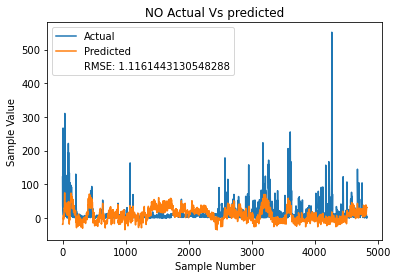

C:\Users\mubas\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


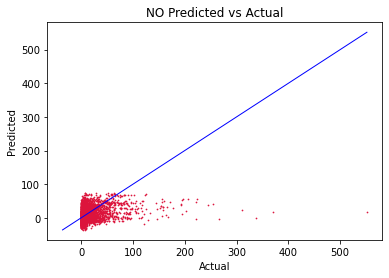

<ipython-input-114-ab8403e93b48>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())
<ipython-input-115-d76f363aec79>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())


Fitting 5 folds for each of 49 candidates, totalling 245 fits


C:\Users\mubas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


test ->  NO2  ->  1.095035319989139


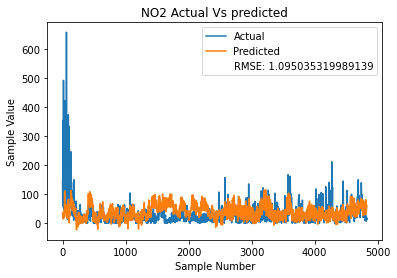

C:\Users\mubas\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


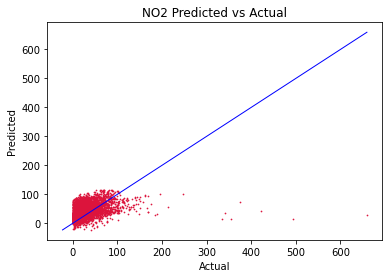

<ipython-input-114-ab8403e93b48>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())
<ipython-input-115-d76f363aec79>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())


Fitting 5 folds for each of 49 candidates, totalling 245 fits


C:\Users\mubas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


test ->  O3  ->  1.1507225135866321


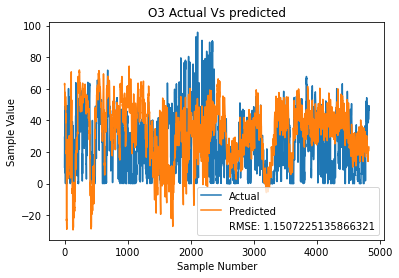

C:\Users\mubas\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


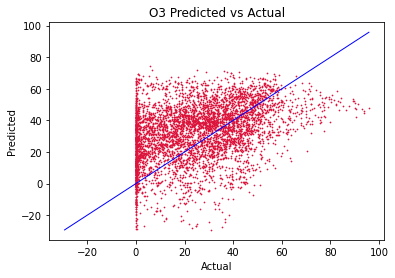

<ipython-input-114-ab8403e93b48>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())
<ipython-input-115-d76f363aec79>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())


Fitting 5 folds for each of 49 candidates, totalling 245 fits


C:\Users\mubas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


test ->  PM1  ->  0.9635081598113098


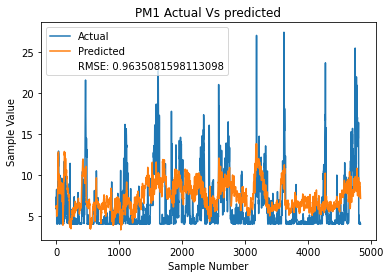

C:\Users\mubas\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


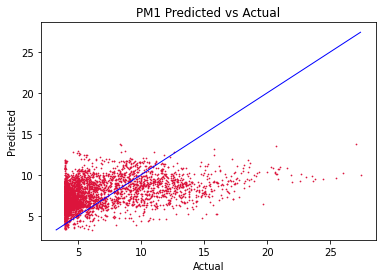

<ipython-input-114-ab8403e93b48>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())
<ipython-input-115-d76f363aec79>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())


Fitting 5 folds for each of 49 candidates, totalling 245 fits


C:\Users\mubas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


test ->  PM10  ->  0.9906426521436212


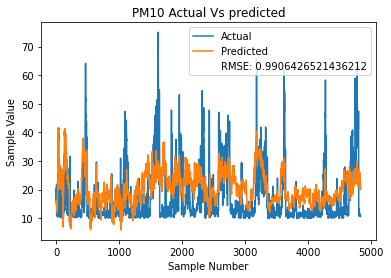

C:\Users\mubas\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


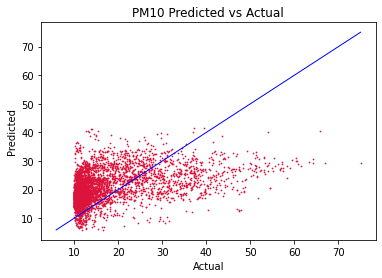

<ipython-input-114-ab8403e93b48>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())
<ipython-input-115-d76f363aec79>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())


Fitting 5 folds for each of 49 candidates, totalling 245 fits


C:\Users\mubas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


test ->  PM25  ->  0.9827796346573363


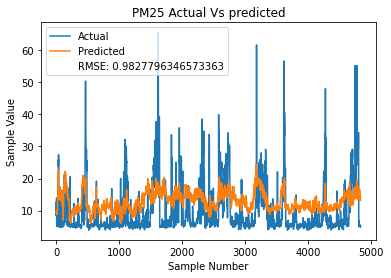

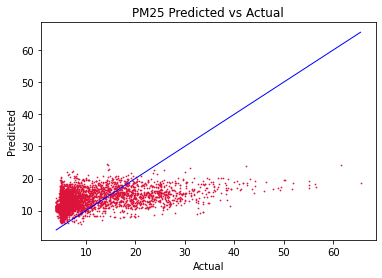

In [122]:
#################amended

temp_df = pd.DataFrame()
#temp_df['test_zid'] = ['392,409']
for i,p in enumerate(poll_new):    
    test_X,test_Y = test_set(frames[poll_df[i]], p,199,225)
    train_X,train_Y = train_set(frames[poll_df[i]], p,199,225)

    sc_X = StandardScaler()
    sc_Y = StandardScaler()
    train_X = sc_X.fit_transform(train_X.values)
    train_Y = sc_Y.fit_transform(train_Y.values)
    tscv = TimeSeriesSplit(n_splits=5)
    param = {'kernel' : ['rbf'],'C' : [1,2,3,5,7,10,15],'epsilon': [1,2,4,6,8,10,15]}
    grid_search = GridSearchCV( estimator = SVR(),param_grid = param, cv = tscv, n_jobs = -1, verbose = 2)

    grid_search.fit(train_X,train_Y)

    ts_X = StandardScaler()
    ts_Y = StandardScaler()
    test_X = ts_X.fit_transform(test_X.values)
    test_Y = ts_Y.fit_transform(test_Y.values)

    y_pred = grid_search.predict(test_X)

    mse = mean_squared_error(test_Y,y_pred)
    rmse = np.sqrt(mse)
    print('test', '-> ',p,' -> ',rmse)
    #temp_df[p] = [rmse]

    test_Y_new=ts_Y.inverse_transform(test_Y, copy=None)
    y_pred_new=ts_Y.inverse_transform(y_pred, copy=None)

    plt.plot(test_Y_new, label = "Actual")
    # line 2 points

    # plotting the line 2 points 
    plt.plot(y_pred_new, label = "Predicted")
    plt.xlabel('Sample Number')
    # Set the y axis label of the current axis.
    plt.ylabel('Sample Value')
    # Set a title of the current axes.
    plt.title(p+' Actual Vs predicted')
    # show a legend on the plot
    plt.plot([], [], ' ', label='RMSE: '+str(rmse))
    plt.legend()
    # Display a figure.

    plt.savefig('D:/'+p+'_line.svg', format='svg', dpi=1200)
    plt.show()
    
 
    fig, ax = plt.subplots()
    #ax.scatter(file[i+'_Actual'], file[i+'_Pred'], s=2, c='crimson', marker='.')
    ax.scatter(test_Y_new, y_pred_new, s=2, c='crimson', marker='.')
    #ax.plot([y.min(), y.max()], [y.min(), y.max()], 'b-', lw=1)
#     p1 = max(max(file[i+'_Pred']), max(file[i+'_Actual']))
#     p2 = min(min(file[i+'_Pred']), min(file[i+'_Actual']))

    p1 = max(max(y_pred_new), max(test_Y_new))
    p2 = min(min(y_pred_new), min(test_Y_new))
    ax.plot([p1, p2], [p1, p2], 'b-', lw=1)
    ax.set_title(p+' Predicted vs Actual')
    ax.set_ylabel('Predicted')
    ax.set_xlabel('Actual')
    plt.show()
    fig.savefig('D:/'+p+'_scatter.svg', format='svg', dpi=1200)

#result_df = result_df.append(temp_df, ignore_index = True)
#result_df.to_csv('D:/Air-Pot/Live_tap/agilysis-model/model_results.csv',index=False) 

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy_score(test_Y_new, y_pred_new) 

ValueError: continuous is not supported

In [ ]:
result_df

In [785]:
result_df = result_df.append(temp_df, ignore_index = True)
result_df

,test_zid,NO,NO2,O3,PM1,PM10,PM25
0,409,1.23622,1.170437,1.032794,1.457473,1.357577,1.304215
1,409,1.23622,1.170437,1.032794,1.457473,1.357577,1.304215


In [784]:
temp_data_NO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34374 entries, 0 to 34373
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         34374 non-null  object 
 1   hour              34374 non-null  int64  
 2   weekday           34374 non-null  int64  
 3   Holiday           34374 non-null  int64  
 4   zid               34374 non-null  int64  
 5   Humidity          34374 non-null  float64
 6   Ambient pressure  19546 non-null  float64
 7   Temp              34374 non-null  float64
 8   speed             34374 non-null  float64
 9   green_area        34374 non-null  float64
 10  road_area         34374 non-null  float64
 11  buildings         34374 non-null  float64
 12  NO2               34374 non-null  float64
dtypes: float64(8), int64(4), object(1)
memory usage: 3.4+ MB


In [754]:
temp_data_NO2.mean()

hour                   11.502356
weekday                 2.995724
Holiday                 0.052743
zid                   289.679089
Humidity               73.387131
Ambient pressure    97638.453172
Temp                    8.906025
speed                  31.690987
green_area             14.813084
road_area              22.546730
buildings               8.490863
NO2                    28.660013
dtype: float64

In [772]:
test_X,test_Y = test_set(temp_data_NO2, 'NO2',338)
train_X,train_Y = train_set(temp_data_NO2, 'NO2',338)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719 entries, 17742 to 20460
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour              2719 non-null   int64  
 1   weekday           2719 non-null   int64  
 2   Holiday           2719 non-null   int64  
 3   Humidity          2719 non-null   float64
 4   Ambient pressure  2719 non-null   float64
 5   Temp              2719 non-null   float64
 6   speed             2719 non-null   float64
 7   green_area        2719 non-null   float64
 8   road_area         2719 non-null   float64
 9   buildings         2719 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 233.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31655 entries, 0 to 34373
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour              31655 non-null  int64  
 1   weekday          

In [747]:
train_X

,hour,weekday,Holiday,Humidity,Ambient pressure,Temp,speed,green_area,road_area,buildings
0,22,4,0,91.383333,96795.93333,5.500000,48.56,31.859699,21.805012,17.715170
1,23,4,0,91.933333,96784.33333,6.000000,48.56,31.859699,21.805012,17.715170
2,0,5,0,90.466667,96757.76667,6.000000,49.00,31.859699,21.805012,17.715170
3,1,5,0,90.000000,96717.10000,6.433333,49.00,31.859699,21.805012,17.715170
4,2,5,0,89.466667,96684.26667,7.000000,49.00,31.859699,21.805012,17.715170
...,...,...,...,...,...,...,...,...,...,...
34369,9,0,1,42.210210,101576.88590,11.723724,28.15,25.894472,7.581914,3.901272
34370,10,0,1,40.930931,101635.67270,12.000000,34.60,25.894472,7.581914,3.901272
34371,11,0,1,39.781155,101627.96350,12.623100,34.60,25.894472,7.581914,3.901272
34372,12,0,1,37.790274,101614.76290,13.908815,34.60,25.894472,7.581914,3.901272


In [712]:
sc_X = StandardScaler()
sc_Y = StandardScaler()
train_X = sc_X.fit_transform(train_X.values)
train_Y = sc_Y.fit_transform(train_Y.values)

In [713]:
param = {'kernel' : ['rbf'],'C' : [1,2,5,10],'epsilon': [2,5,10,20]}
grid_search = GridSearchCV( estimator = SVR(),param_grid = param, cv = 2, n_jobs = -1, verbose = 2)

In [714]:
grid_search.fit(train_X,train_Y)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


D:\python_dev\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=2, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 2, 5, 10], 'epsilon': [2, 5, 10, 20],
                         'kernel': ['rbf']},
             verbose=2)

In [715]:
ts_X = StandardScaler()
ts_Y = StandardScaler()
test_X = ts_X.fit_transform(test_X.values)
test_Y = ts_Y.fit_transform(test_Y.values)

In [716]:
y_pred = grid_search.predict(test_X)

In [717]:
mse = mean_squared_error(test_Y,y_pred)
rmse = np.sqrt(mse)
rmse

1.5738347930349472

In [718]:
test_Y_new=ts_Y.inverse_transform(test_Y, copy=None)

In [719]:
y_pred_new=ts_Y.inverse_transform(y_pred, copy=None)

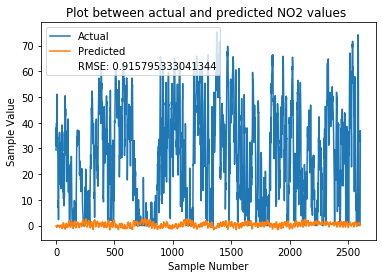

In [728]:

# plotting the line 1 points 
plt.plot(test_Y, label = "Actual")
# line 2 points

# plotting the line 2 points 
plt.plot(y_pred, label = "Predicted")
plt.xlabel('Sample Number')
# Set the y axis label of the current axis.
plt.ylabel('Sample Value')
# Set a title of the current axes.
plt.title('Plot between actual and predicted NO2 values ')
# show a legend on the plot
plt.plot([], [], ' ', label="RMSE: "+str(rmse))
plt.legend()
# Display a figure.

#plt.savefig('D:/test.svg', format='svg', dpi=1200)
plt.show()



In [588]:
test_Y=test_Y.to_numpy()
test_Y=np.concatenate(test_Y, axis=None)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [609]:
for i in range(2606):
    print(test_Y[i],'->',   y_p[i])

[148.9302326] -> 38.42190623298069
[73.1] -> 39.799701168943685
[69.18333333] -> 41.038803737682045
[78.03333333] -> 41.31696597777727
[74.6] -> 41.97534476815744
[71.28333333] -> 43.142352466345855
[69.76666667] -> 41.39668997841582
[75.] -> 40.47900972736701
[355.2] -> 54.799181670021774
[61.38333333] -> 55.07142498155528
[59.25] -> 55.315968322303206
[56.5] -> 57.403713340631185
[55.5] -> 56.9283578175349
[56.26666667] -> 54.88482508948159
[58.92592593] -> 58.92062732091786
[493.2857143] -> 51.25776156978954
[89.] -> 52.475089997624536
[82.86666667] -> 51.76808888336787
[65.71666667] -> 52.94722751501792
[63.71666667] -> 55.62998013590829
[62.11666667] -> 59.31580607991273
[56.55] -> 63.40169899310369
[46.25] -> 62.44789136596205
[46.42424242] -> 51.90075908642409
[188.5555556] -> 51.78919808357639
[102.3666667] -> 55.74559858359146
[102.] -> 57.84516257299896
[91.68333333] -> 58.924079946504406
[82.25] -> 60.13369295547764
[83.35] -> 61.14308096580348
[82.08695652] -> 58.9402281157

IndexError: index 2463 is out of bounds for axis 0 with size 2463

1.5738347930349472

In [498]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(test_Y, y_pred, squared=False)
rms

2.826416191087501

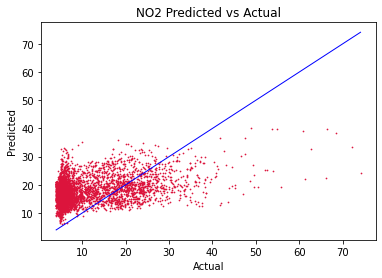

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Air-Pot/Live_tap/agilysis-model/data/NO2.svg'

In [108]:
import matplotlib.pyplot as plt
p =['NO2', 'PM10', 'SO2', 'FINE', 'O3', 'PM1', 'PM25', 'TSP', 'CO','NO']
#p =['NO']
for i in p:    
    #file = pd.read_csv('D:/Air-Pot/split_data/results1/'+i+'_prediction.csv')
    file = y_pred_new 
    fig, ax = plt.subplots()
    #ax.scatter(file[i+'_Actual'], file[i+'_Pred'], s=2, c='crimson', marker='.')
    ax.scatter(test_Y_new, file, s=2, c='crimson', marker='.')
    #ax.plot([y.min(), y.max()], [y.min(), y.max()], 'b-', lw=1)
#     p1 = max(max(file[i+'_Pred']), max(file[i+'_Actual']))
#     p2 = min(min(file[i+'_Pred']), min(file[i+'_Actual']))

    p1 = max(max(y_pred_new), max(test_Y_new))
    p2 = min(min(y_pred_new), min(test_Y_new))
    ax.plot([p1, p2], [p1, p2], 'b-', lw=1)
    ax.set_title(i+' Predicted vs Actual')
    ax.set_ylabel('Predicted')
    ax.set_xlabel('Actual')
    plt.show()
    fig.savefig('D:/Air-Pot/Live_tap/agilysis-model/data/'+i+'.svg', format='svg', dpi=1200)

In [714]:
dataset = pd.read_csv('D:/Position_Salaries.csv')
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2:3].values.astype(float)
y

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

In [ ]:
def feature_selection(df, pollutant):
    # pearson's correlation feature (10) selection for numeric input and numeric output
   
    # generate dataset
    y = df[pollutant]
    X = df.drop(pollutant,axis=1)

    
    # Perform feature selection
    selector = SelectKBest(f_regression, k='all')
    selector.fit(X, y)

    feature_selected = X.columns[selector.get_support()]
    print("The list of the selected features are:")

    for item in feature_selected:
        print(item)

    df_selected = df[feature_selected]
    
    return df_selected, y

In [ ]:
model_list=[{'name': 'neural_network', 'label': 'NN',
               'class':MLPRegressor(max_iter=50),
               'grid': {'class__learning_rate': ["constant", "invscaling", "adaptive"],
                        'class__activation': ["logistic", "relu", "tanh"]
                       }
            }]

In [ ]:
pred = {}
p_accuracy ={}
for (p,p_data) in zip(pollutant,data_sets):
    print('starting: ',p)
    p_data=p_data.dropna()
    df_selected, y = feature_selection(p_data, p)
    X_train, X_test, y_train, y_test = train_test_split(df_selected, y, test_size=0.2, random_state = 88)
    std_scale = StandardScaler()
    X_train_scaled = std_scale.fit_transform(X_train)
    X_test_scaled = std_scale.transform(X_test)
    r2_accuracy={}
    model = GridSearchCV(pipeline, item['grid'], scoring = 'neg_median_absolute_error', cv = 5,  n_jobs=-1, verbose=2)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    label_r2_acc = p + '_' + item['label']+'_r2'
    r2_accuracy[label_r2_acc] = r2_score(y_test, y_pred)
    pd.DataFrame(y_pred, columns=[p]).to_csv('D:/Air-Pot/split_data/'+p+'_prediction.csv',index=False)

    pred[p] = y_pred
    p_accuracy[p] = r2_accuracy
    print(p,r2_accuracy)
    df = pd.read_csv('D:/Air-Pot/split_data/results1/'+p+'_prediction.csv')
    df.insert(1,'y_test',y_test)
    df.to_csv('D:/Air-Pot/split_data/results1/'+p+'_prediction.csv')